In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


pd.pandas.set_option("display.max_columns", None)
pd.pandas.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: '%.2f' % x)



application_train = pd.read_csv("HomeCredit/Dataset/application_train.csv")



categoric_variable = application_train.columns[application_train.columns.str.contains("RATING|FLAG|STATUS|TYPE|CODE|NOT|APPR|AMT_REQ|BUREAU_HOUR|BUREAU_DAY|BUREAU_WEEK|DEF|FONDKAPREMONT_MODE|WALLSMATERIAL_MODE|EMERGENCYSTATE_MODE" ,regex=True)]

numeric_variable= [col for col in application_train.columns if application_train[col].dtype != "O"
                  and col not in "TARGET"
                  and col not in "SK_ID_CURR"
                  and col not in categoric_variable]


def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


def plot_categorical(dataframe,cat_cols):
    for col in cat_cols:
         temp = dataframe[col].value_counts()
         df1 = pd.DataFrame({col: temp.index, 'Number of contracts': temp.values})
         fig, ax1 = plt.subplots(ncols=1, figsize=(12, 6))
         sns.set_color_codes("pastel")
         sns.barplot(ax=ax1, x=col, y="Number of contracts", data=df1)
         plt.show();


def plot_numerical(dataframe, num_cols, size=[8, 4], bins=50):
    for col in num_cols:
        plt.figure(figsize=size)
        plt.title("Distribution of %s" % col)
        sns.distplot(dataframe[col], kde=True,bins=bins)
        plt.show()



def target_summary_with_cats(dataframe,categorical_cols, target):
    for col in categorical_cols:
        print(pd.DataFrame({"Count": dataframe[col].value_counts(dropna=False),
                            "Ratio": 100 * dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}))
        print("\n\n")
        sns.countplot(x=col, hue="TARGET", data=dataframe);
        plt.show()
        print("\n\n")


def target_summary_with_nums(dataframe,numeric_cols, target):
    for col in numeric_cols:
        print(col, end="\n\n")
        print(pd.DataFrame({"Count": dataframe.groupby(target)[col].count(),
                            "TARGET_MEAN": dataframe.groupby(target)[col].mean()}))
        fig, ax = plt.subplots(nrows=1, figsize=(12, 8))
        plt.subplots_adjust(hspace=0.4, top=0.8)
        g1 = sns.distplot(dataframe[col].loc[dataframe[target] == 1], ax=ax, color="g")
        g1 = sns.distplot(dataframe[col].loc[dataframe[target] == 0], ax=ax, color='r')
        g1.set_title(col + " Distribuition", fontsize=15)
        g1.set_xlabel(col)
        g1.set_xlabel("Frequency")
        plt.show()
        print("\n\n")
    print("\n\n")

In [5]:
def EDA(dataframe,cat_cols,num_cols,target):
    a,b = dataframe.shape
    print("Number of Columns: {0}   Number of Rows: {1}".format(a,b), end="\n\n")
    print("****** The Number of Unique Values for Each Variable ******", end="\n\n")
    print(dataframe.nunique(axis=0), end="\n\n")
    print("****** Numeric Variables ******", end="\n\n")
    print(num_cols, end="\n\n")
    print("****** Categorical Variables ******", end="\n\n")
    print(cat_cols, end="\n\n")
    print("****** The Number of Missing Value for Each Variable ******", end="\n\n")
    print(missing_data(dataframe), end="\n\n")
    plot_categorical(dataframe, cat_cols)
    print("Graph of Categorical Variables was plotted.", end="\n\n")
    plot_numerical(dataframe, num_cols)
    print("Graph of Numeric Variables was plotted.",end="\n\n" )
    print("****** Examination of Categorical Variables According to Target ******",end="\n\n")
    target_summary_with_cats(dataframe, cat_cols, target)
    print("****** Examination of Numerical Variables According to Target ******",end="\n\n")
    target_summary_with_nums(dataframe, num_cols, target)

Number of Columns: 307511   Number of Rows: 122

****** The Number of Unique Values for Each Variable ******

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                      

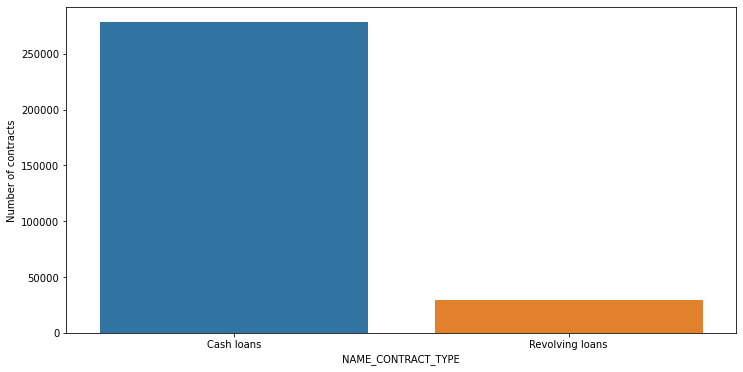

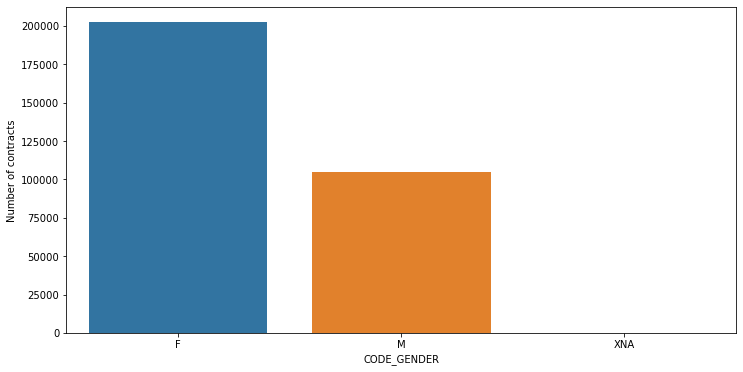

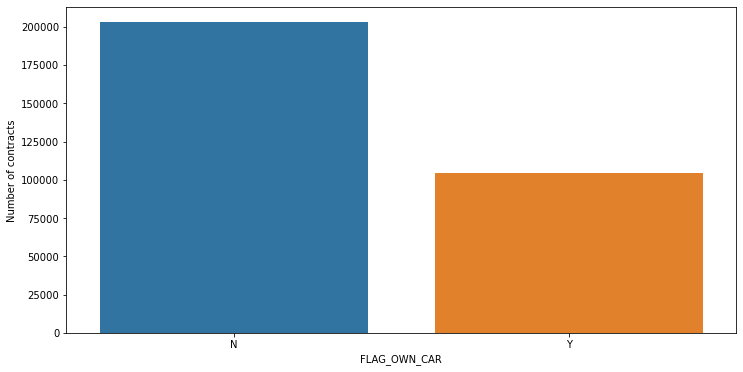

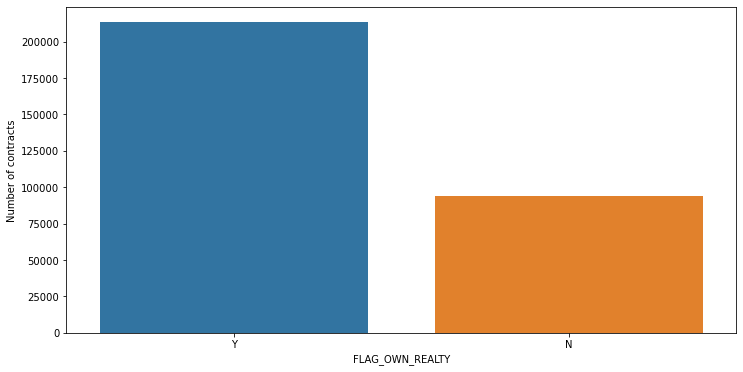

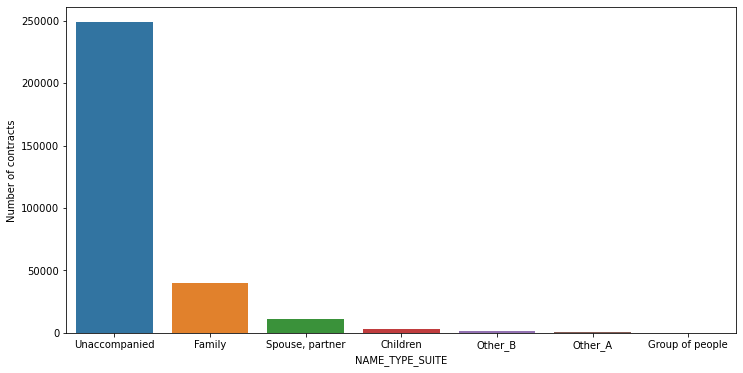

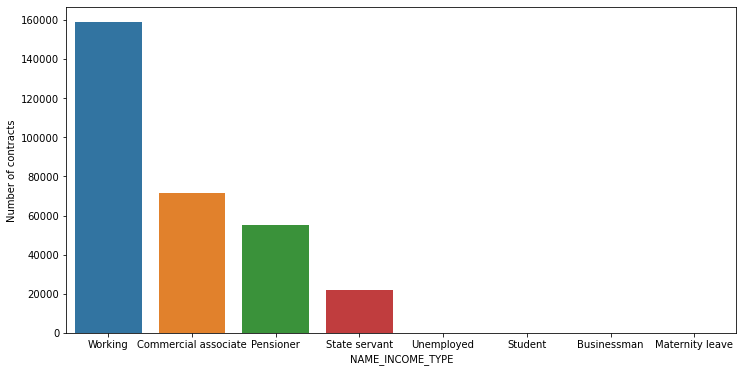

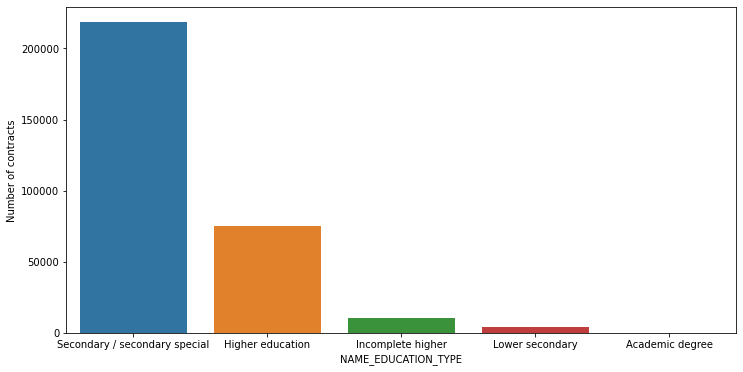

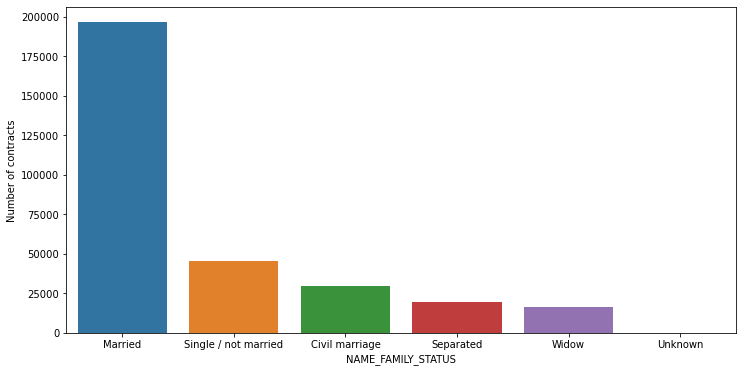

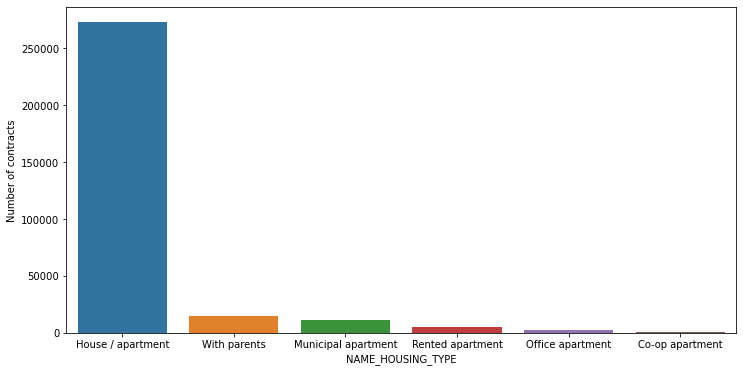

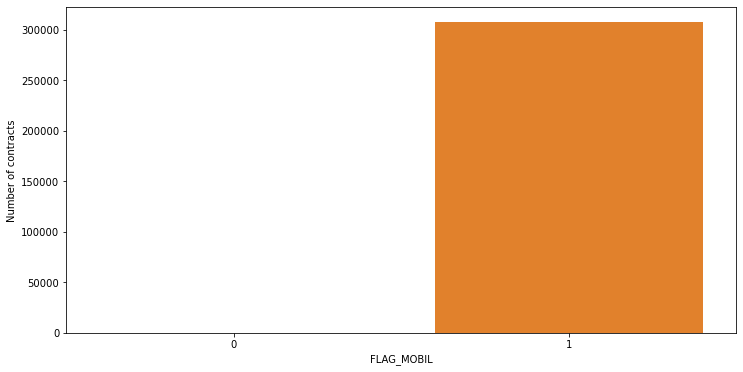

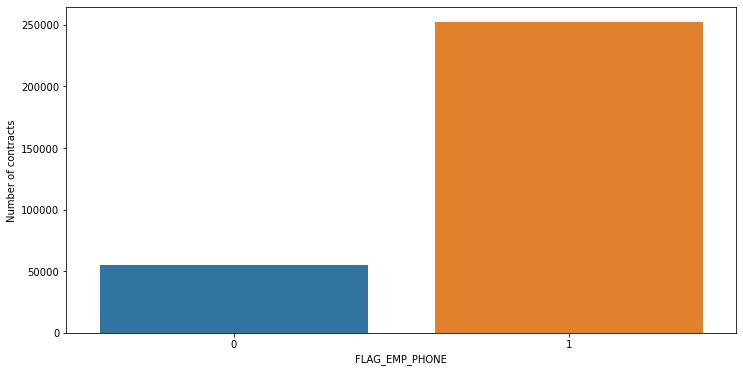

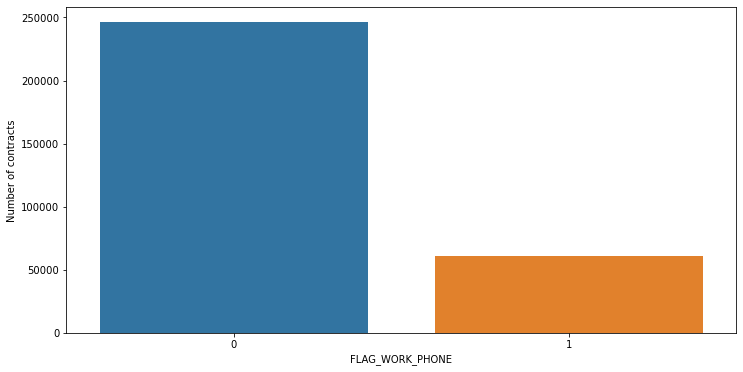

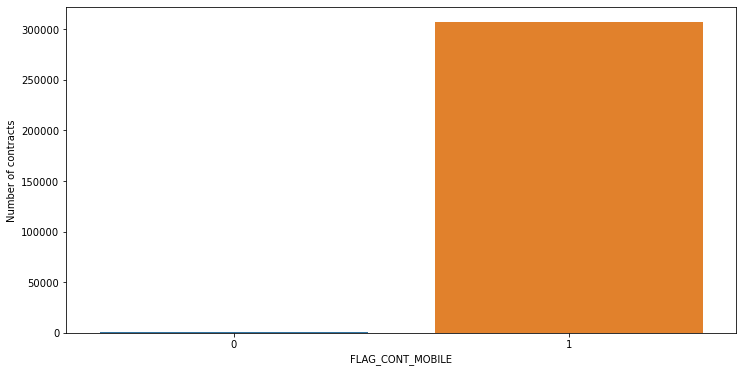

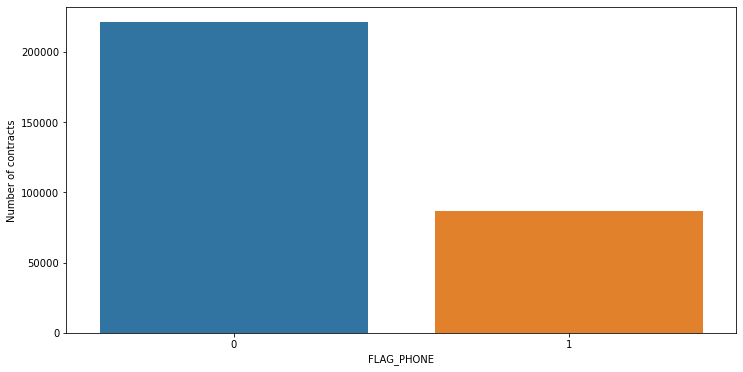

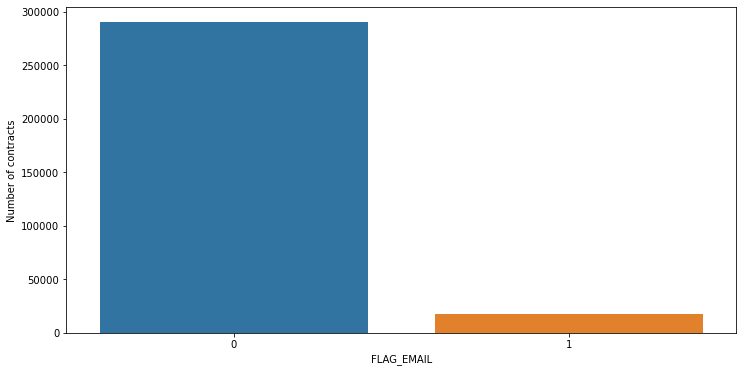

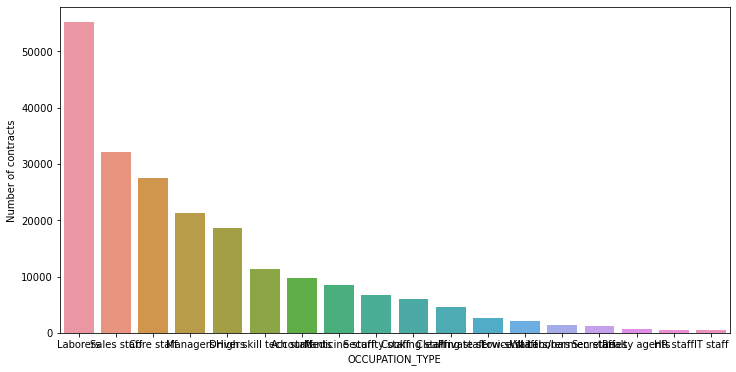

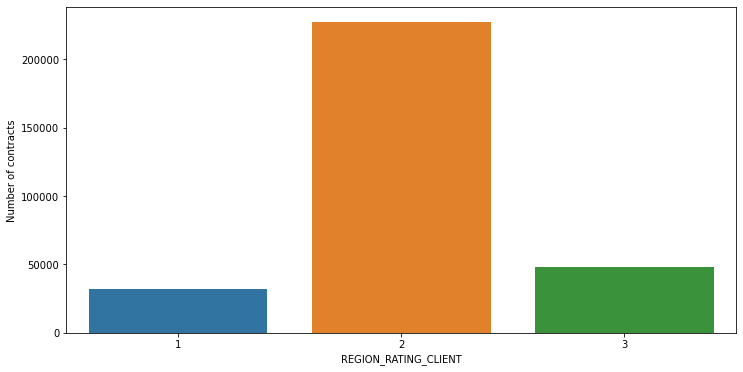

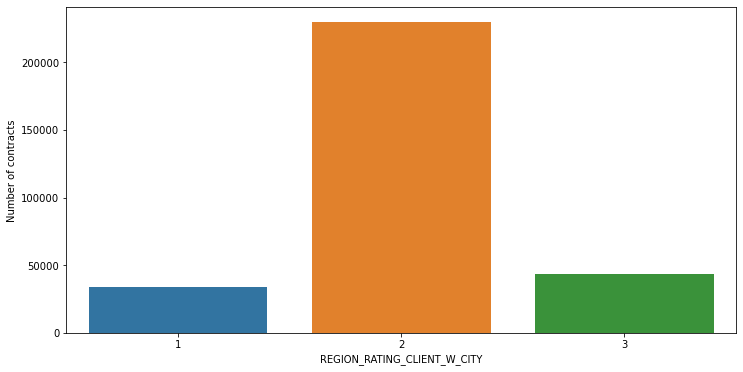

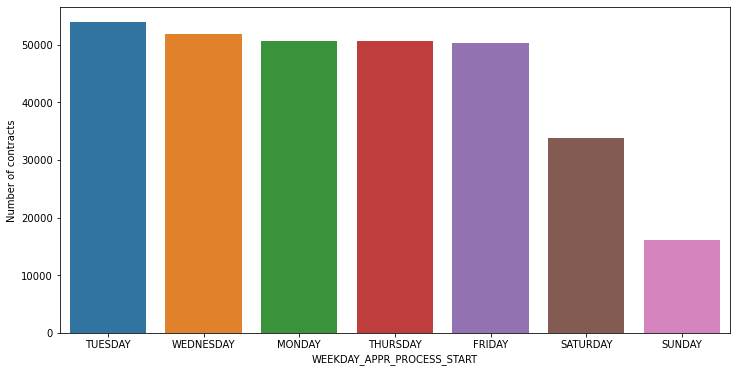

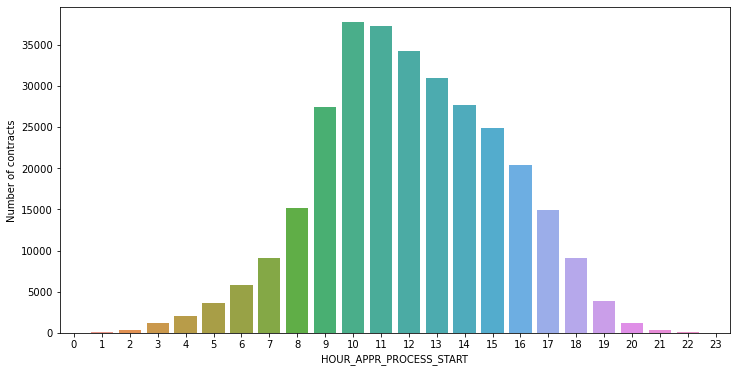

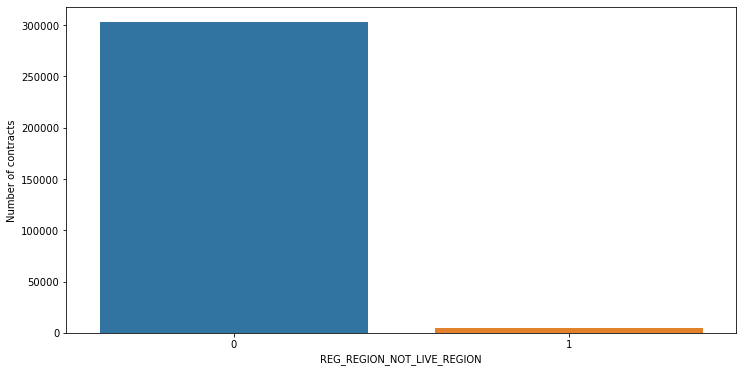

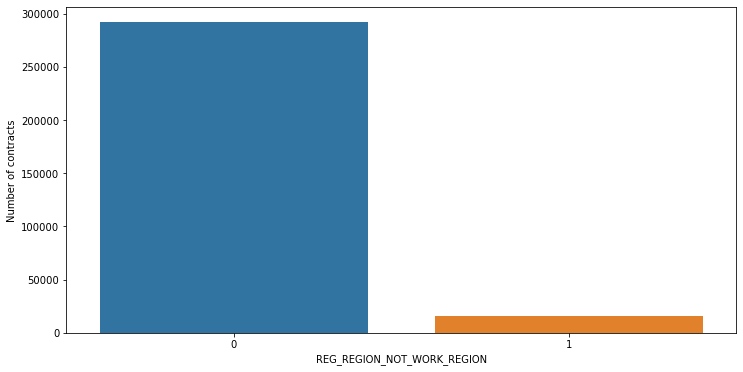

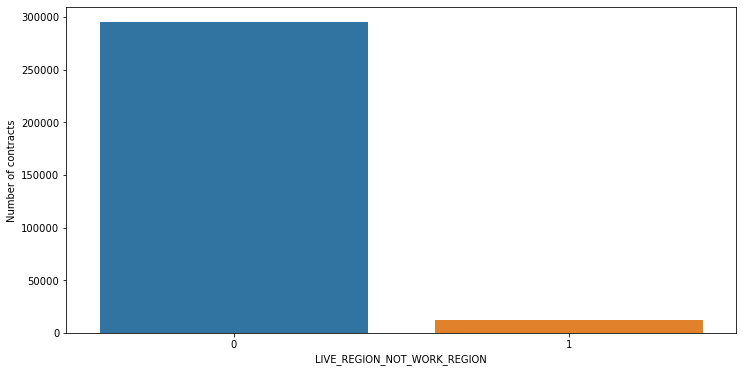

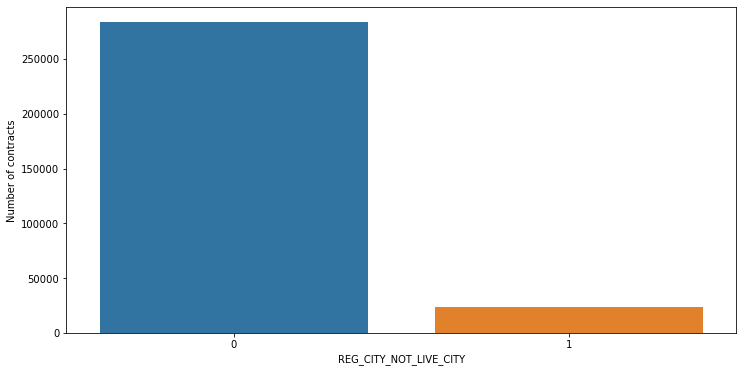

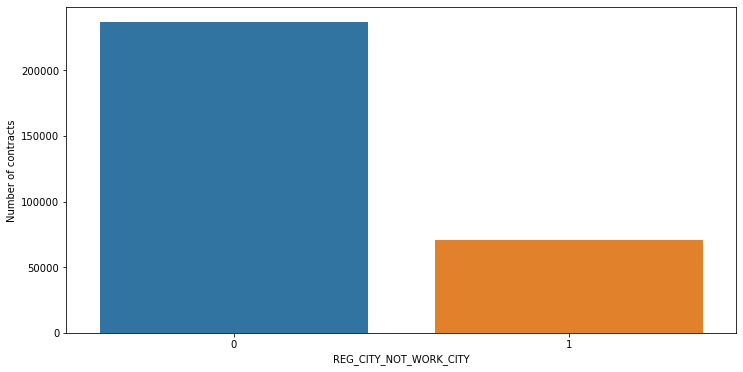

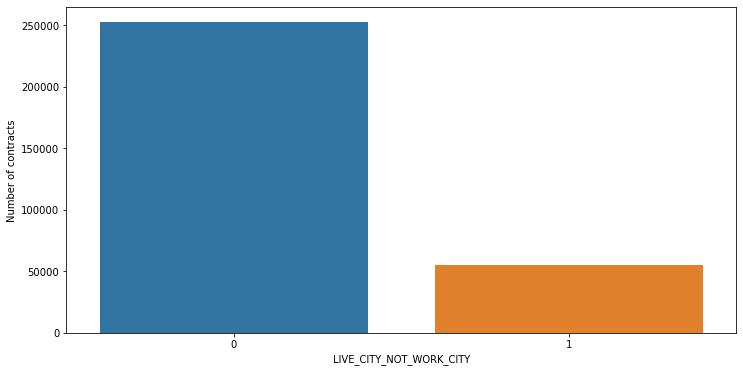

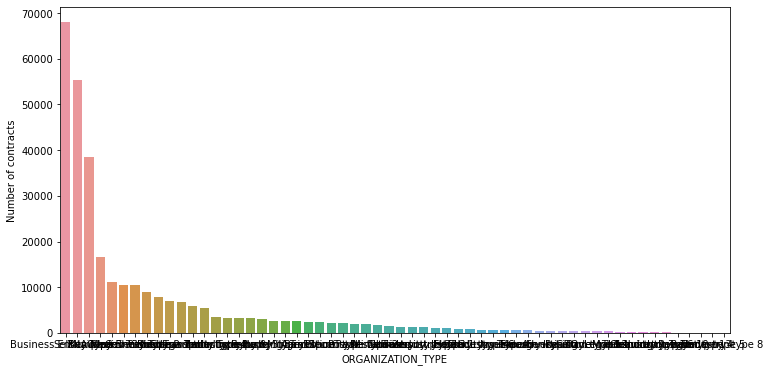

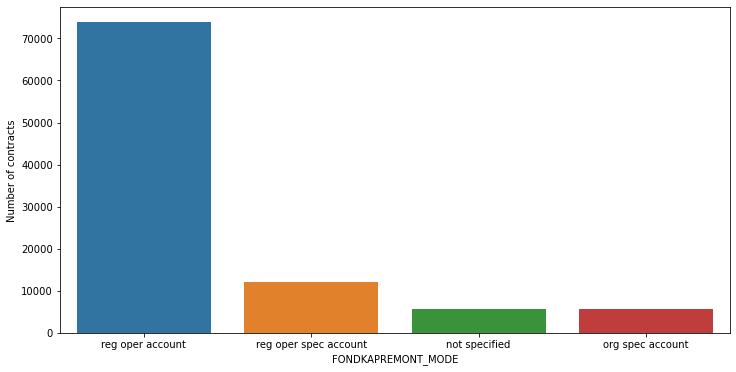

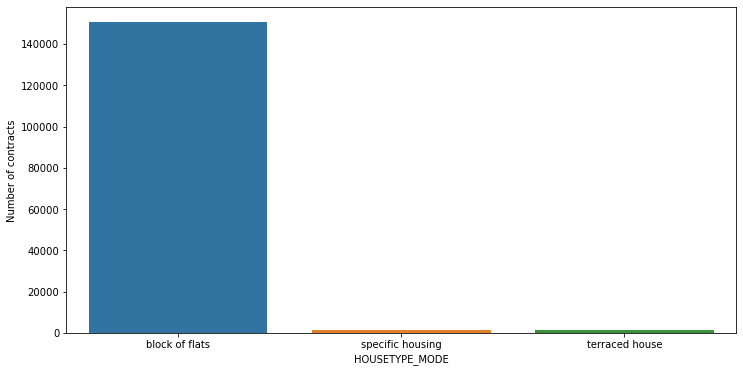

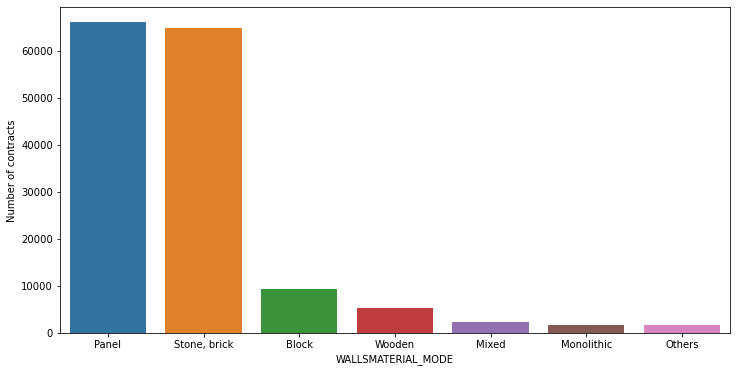

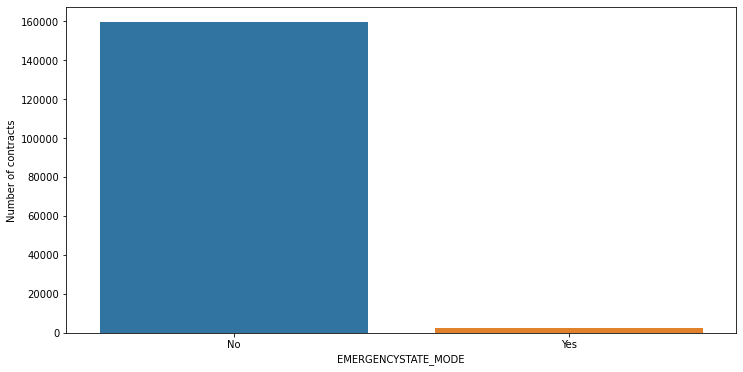

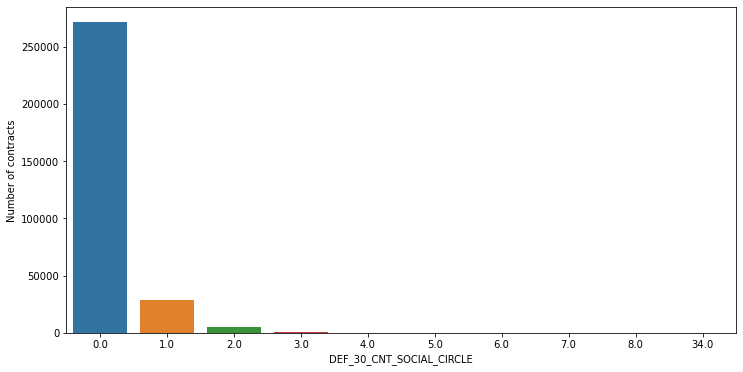

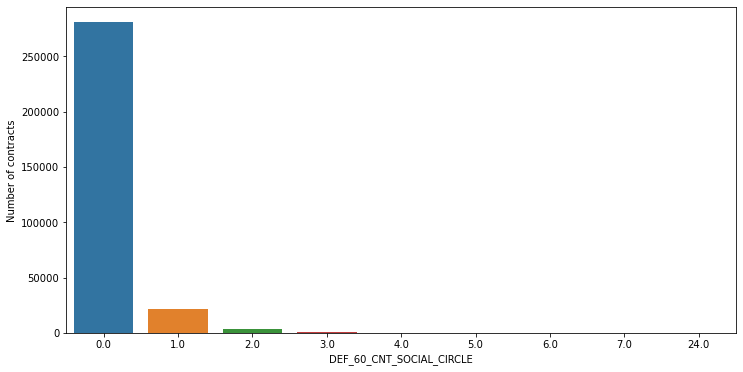

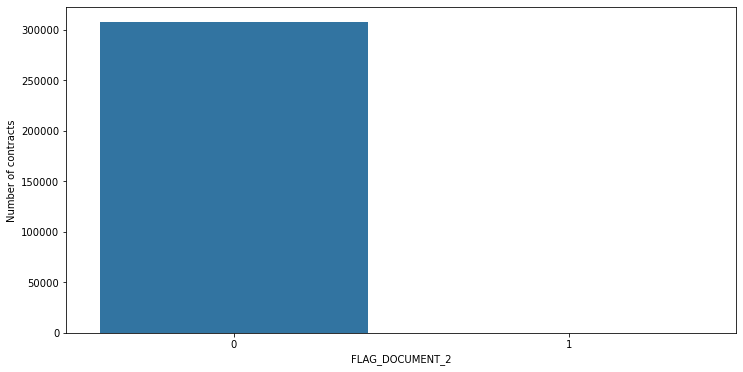

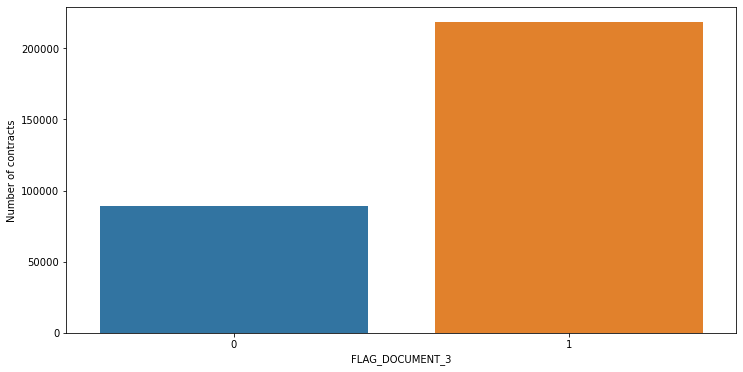

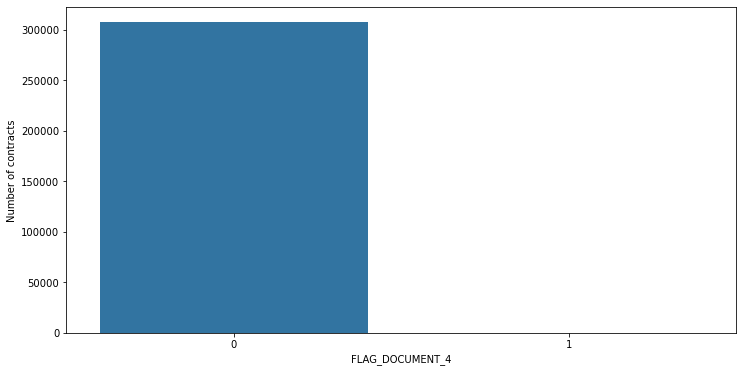

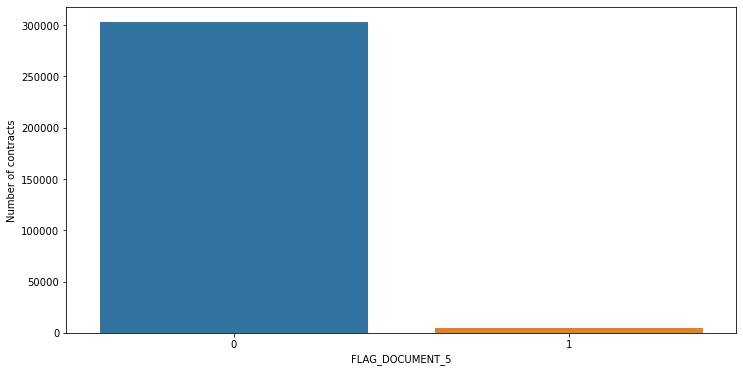

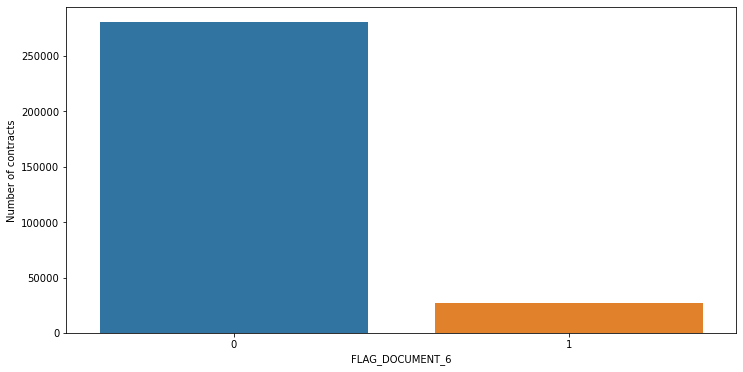

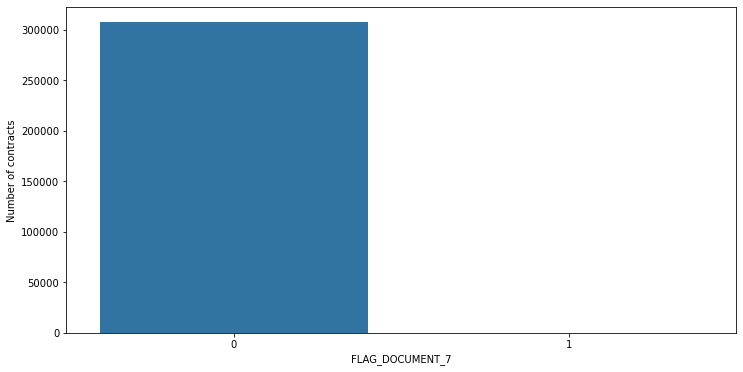

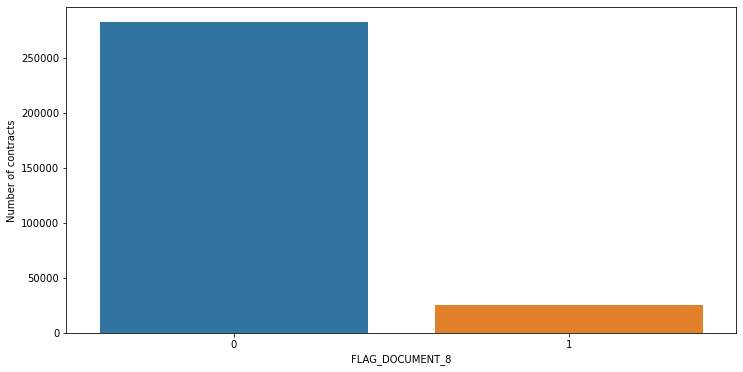

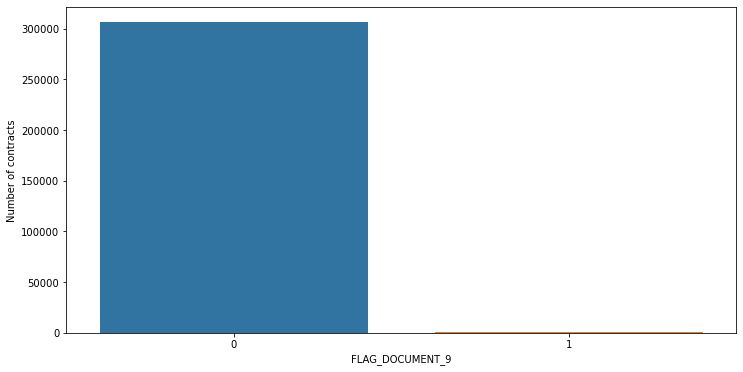

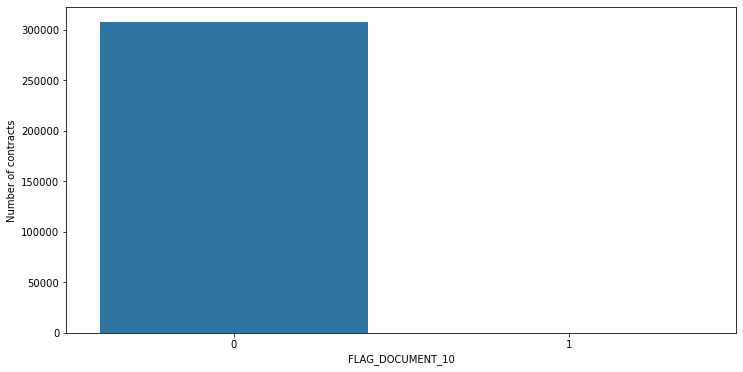

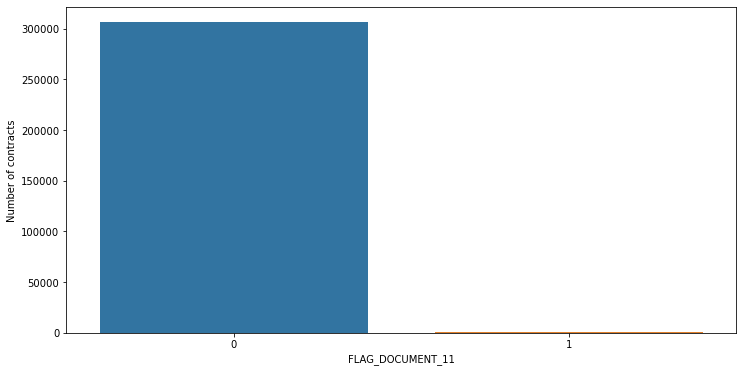

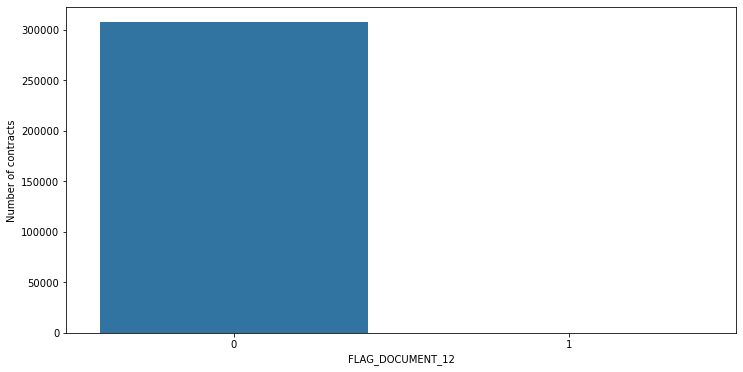

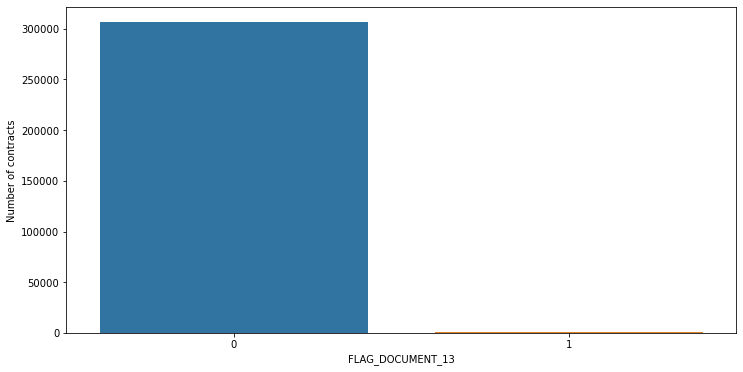

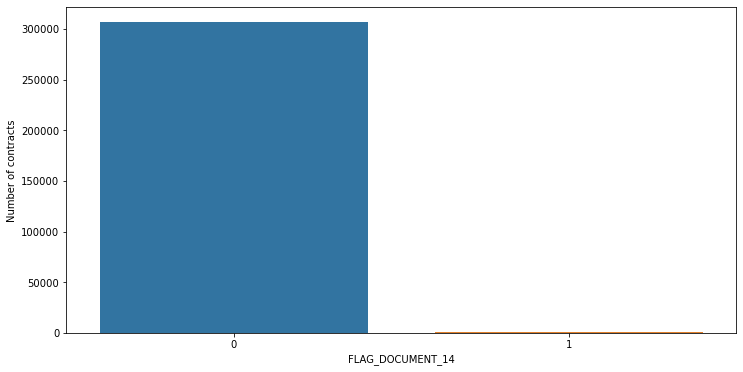

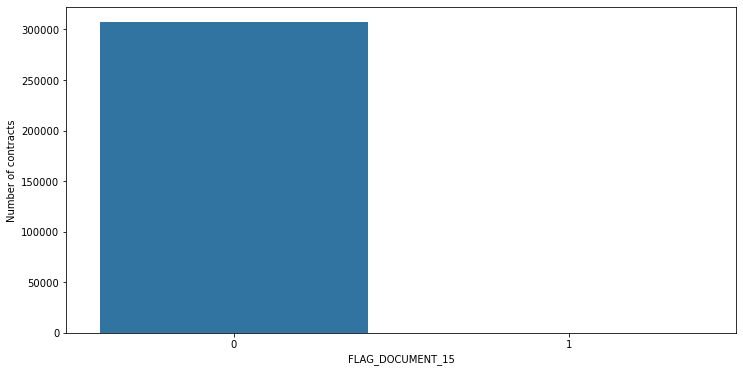

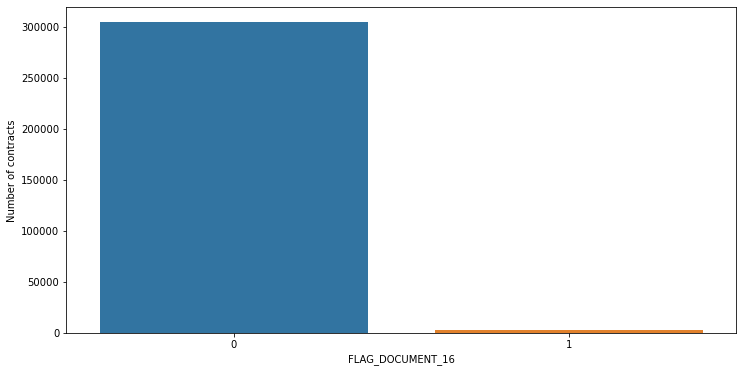

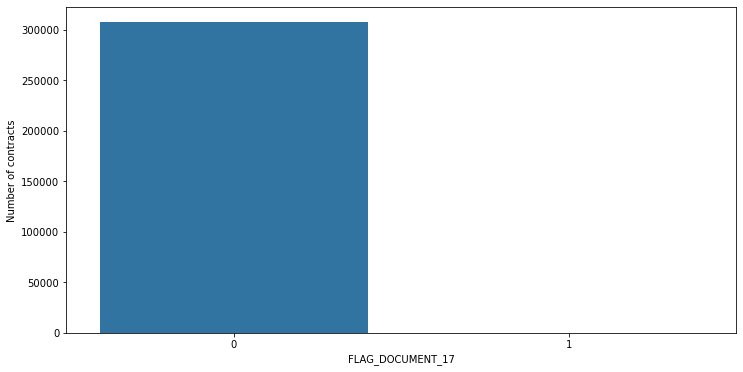

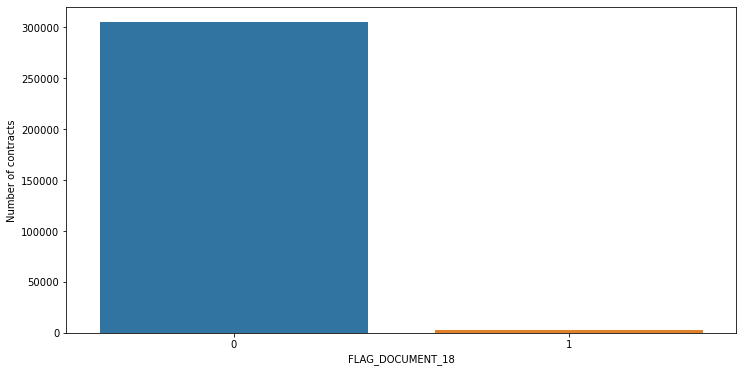

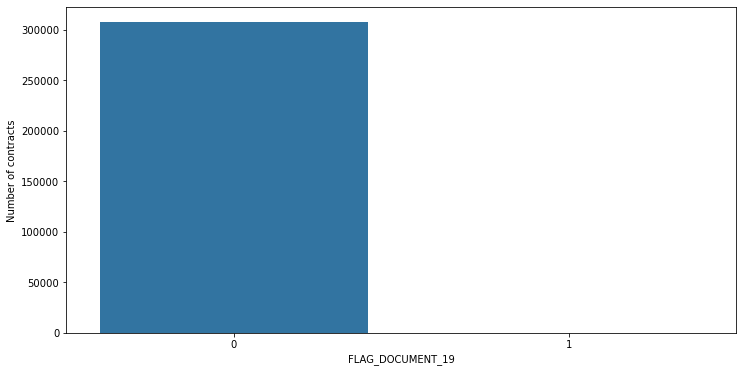

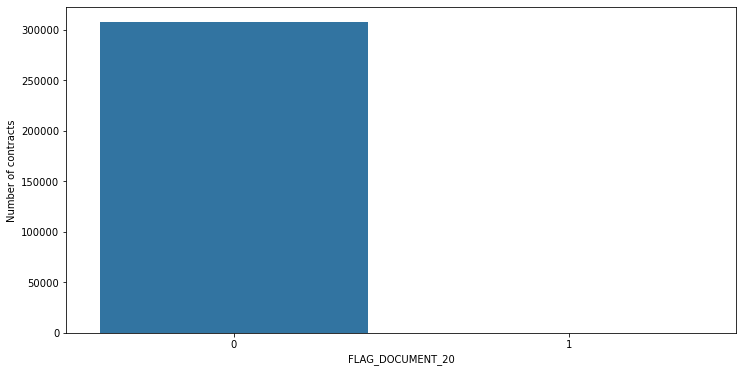

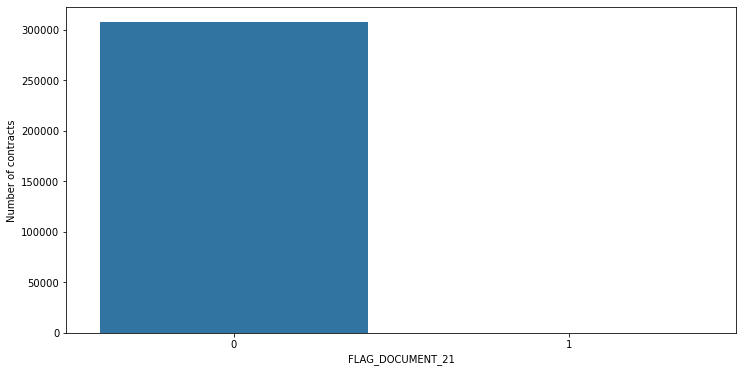

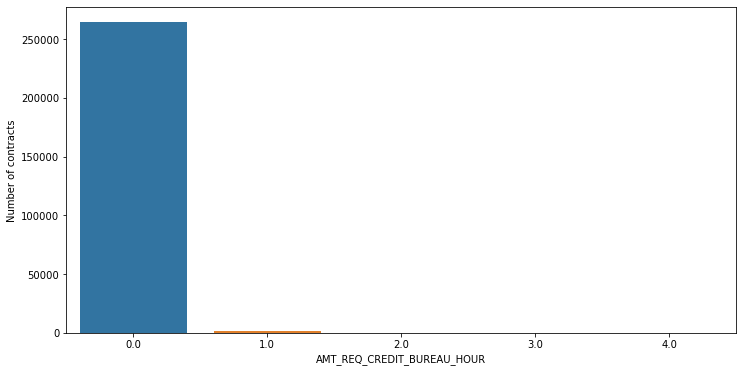

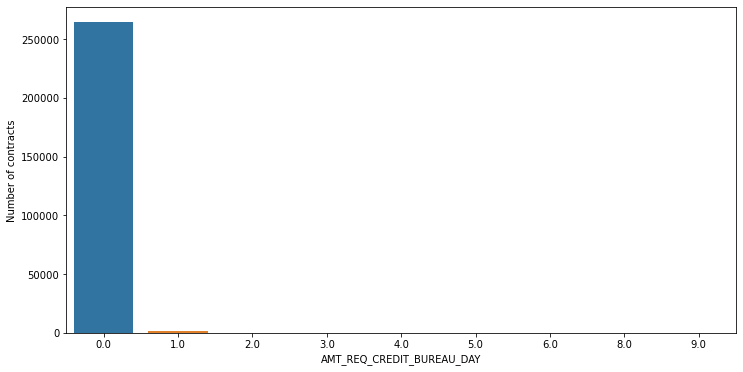

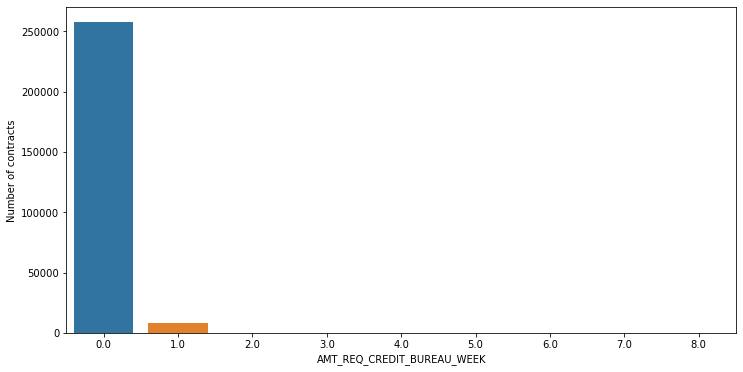

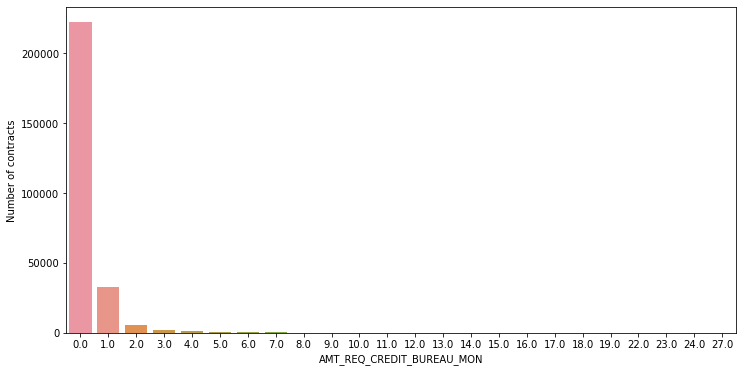

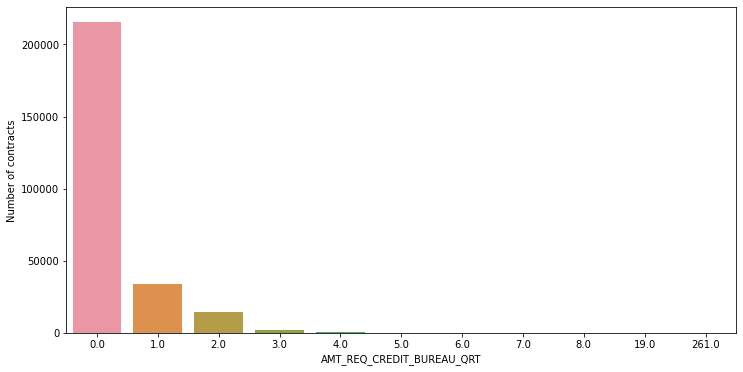

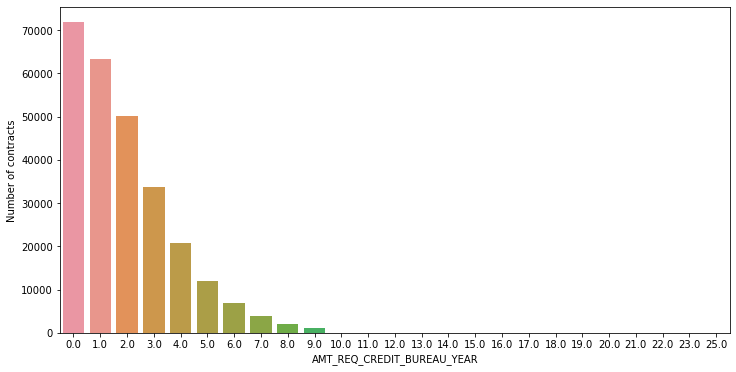

Graph of Categorical Variables was plotted.



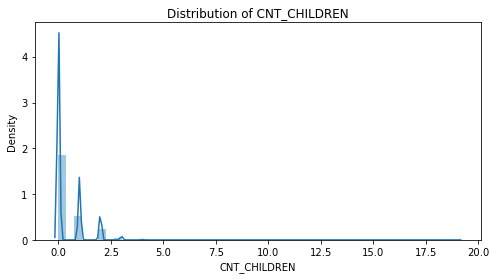

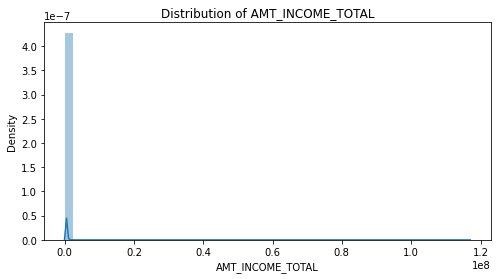

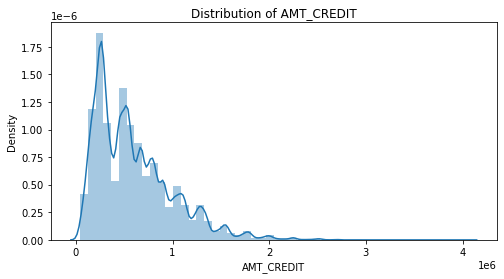

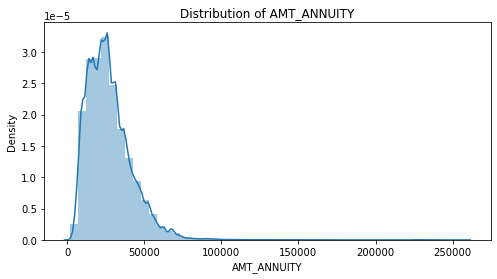

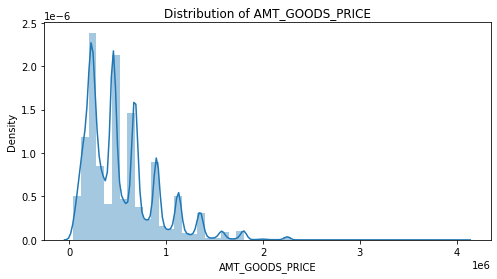

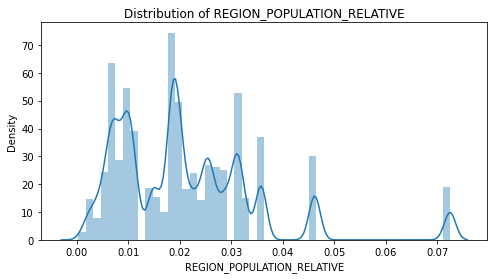

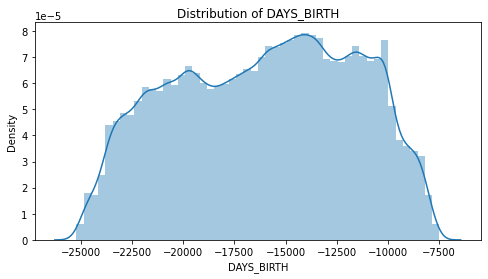

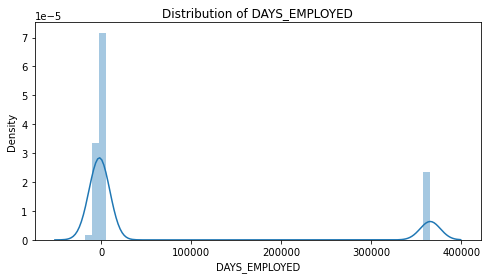

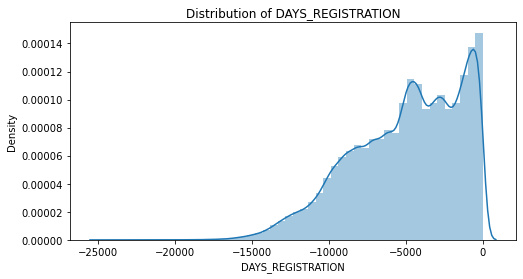

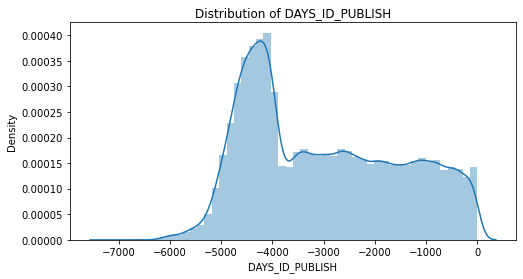

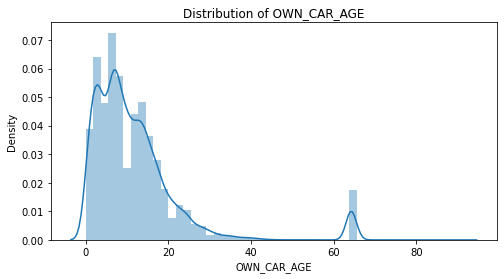

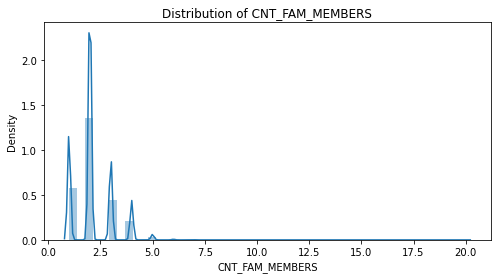

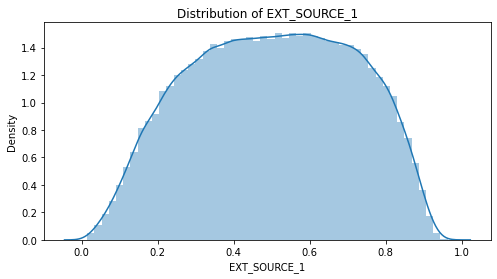

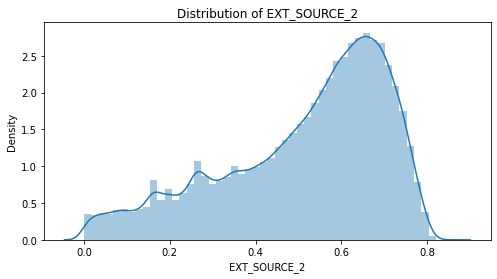

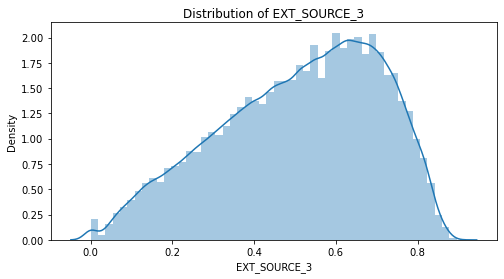

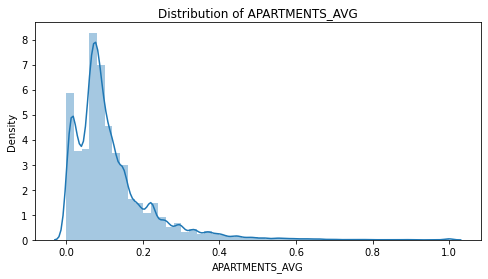

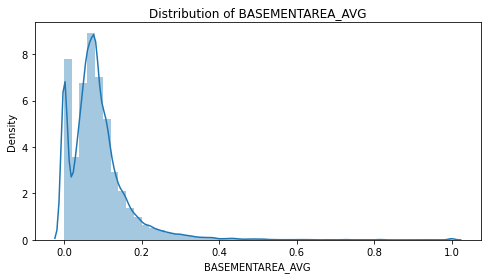

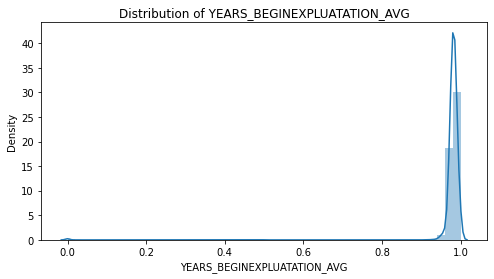

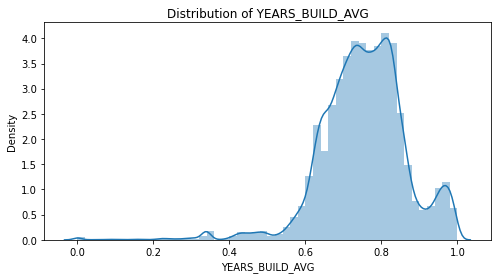

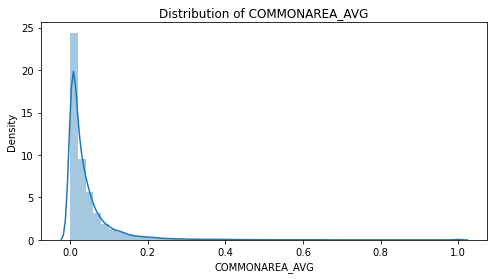

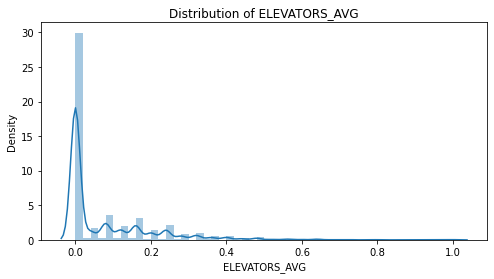

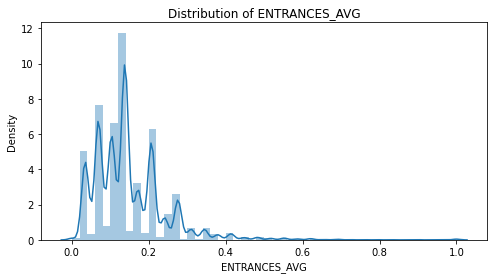

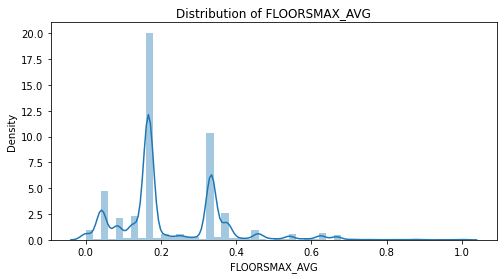

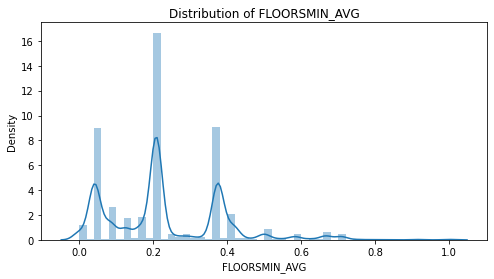

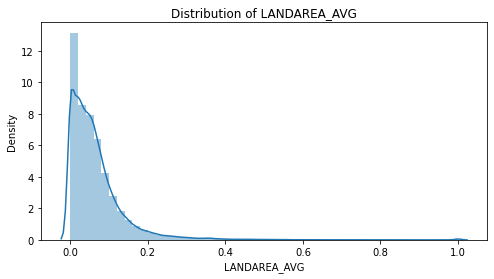

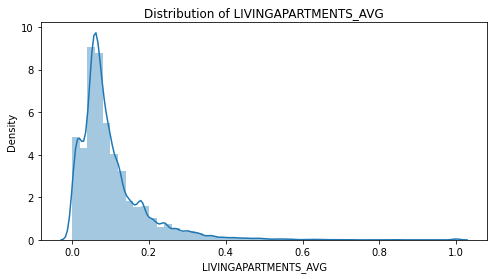

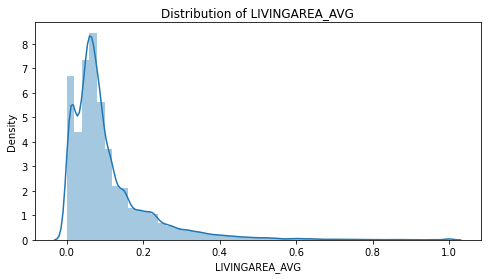

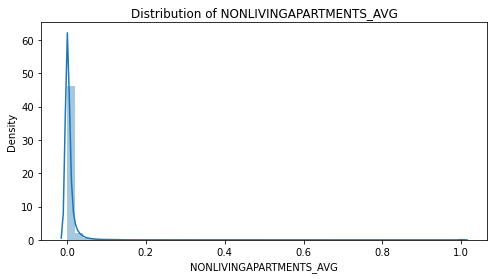

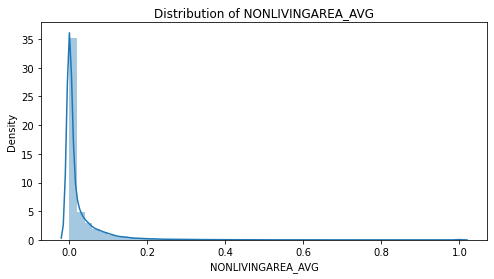

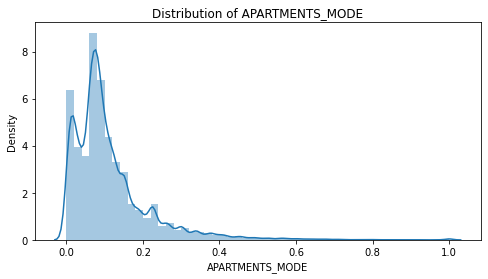

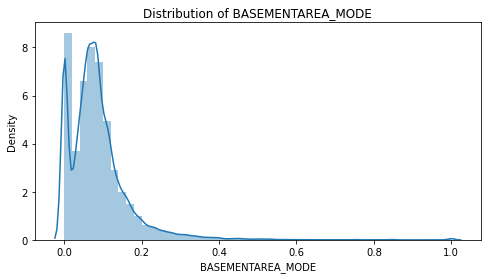

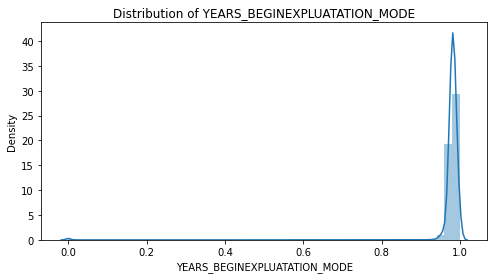

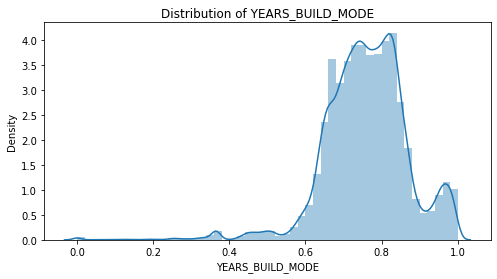

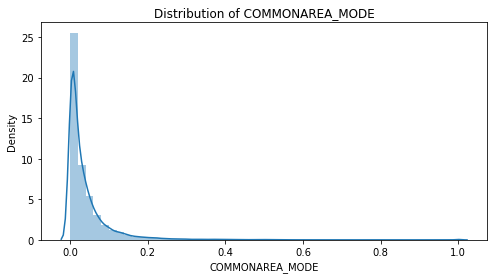

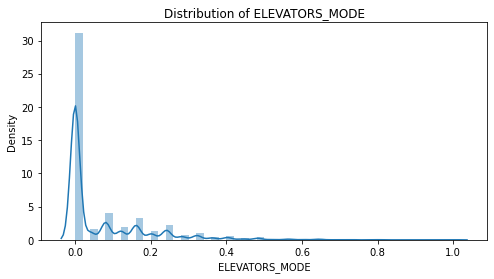

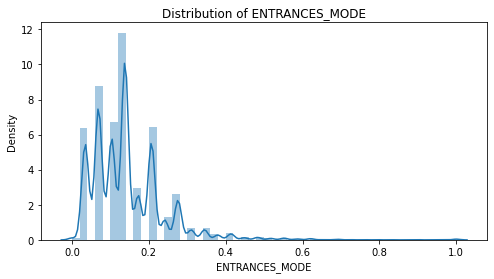

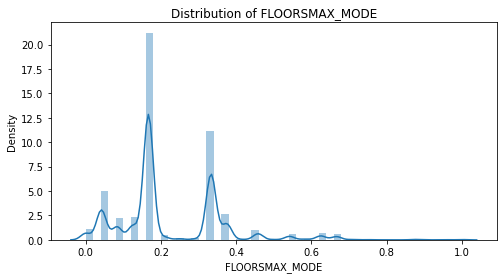

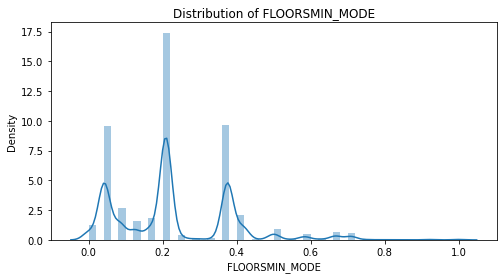

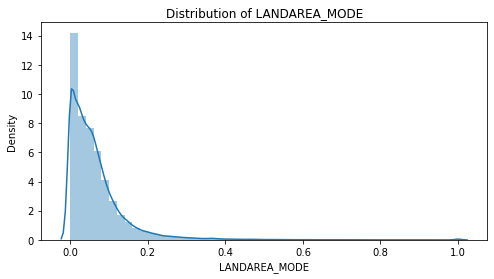

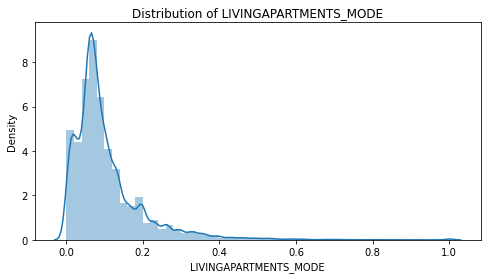

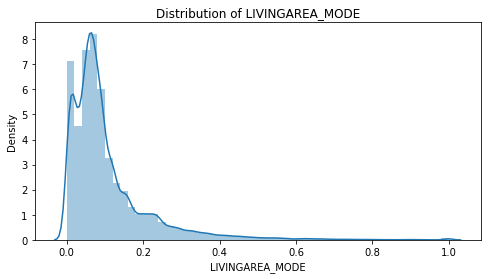

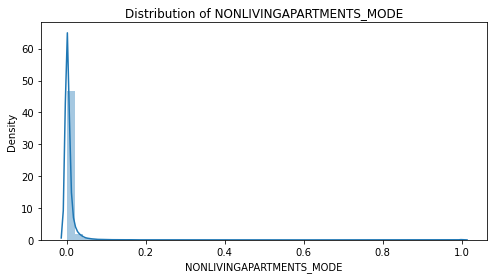

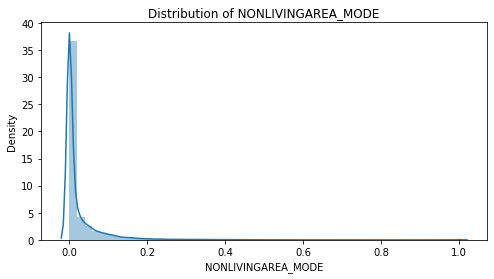

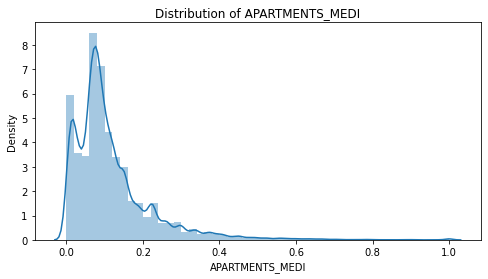

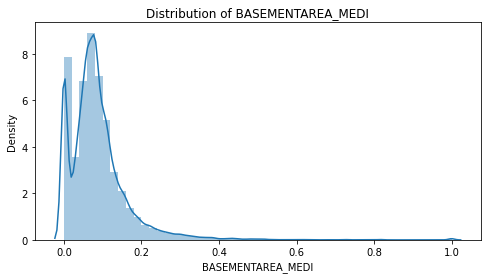

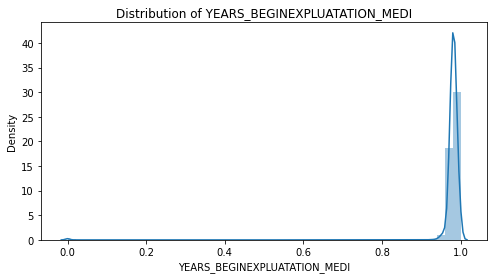

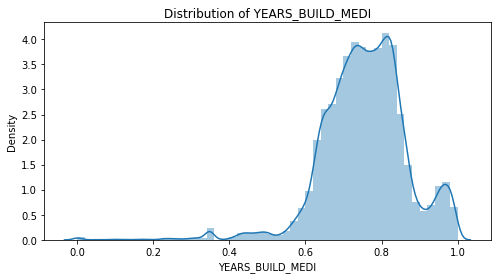

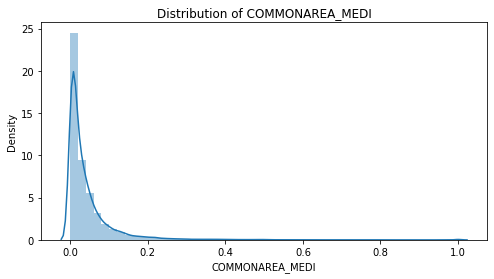

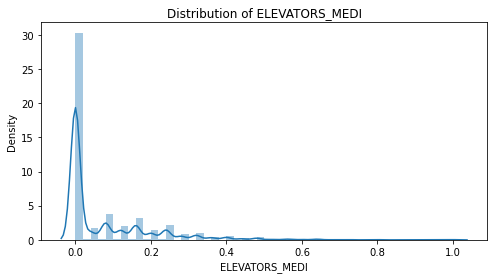

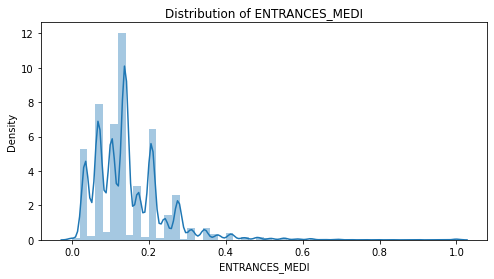

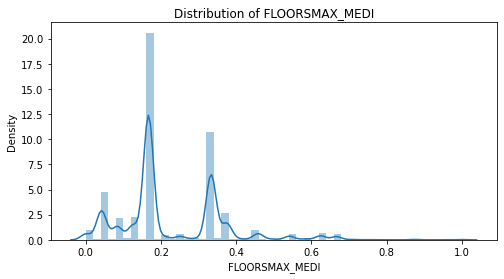

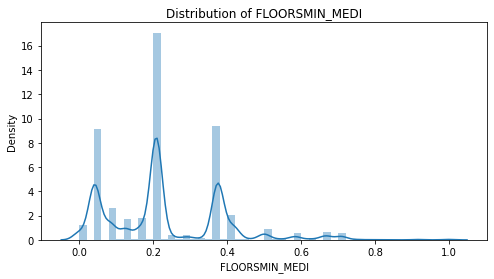

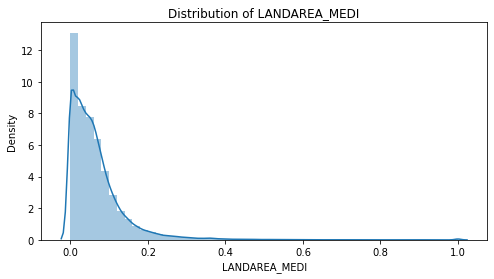

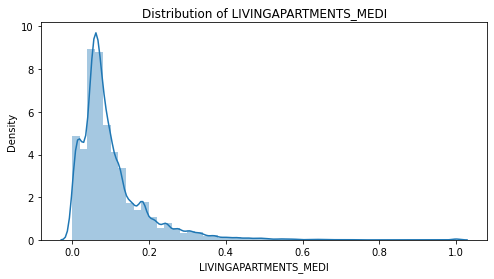

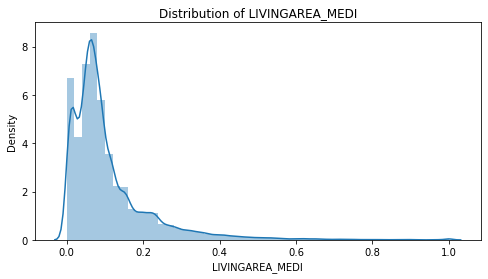

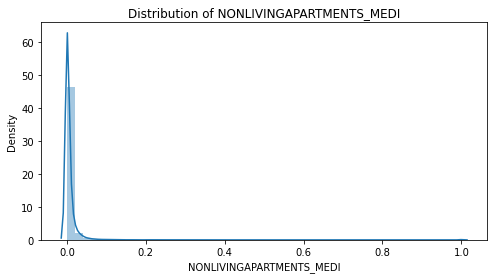

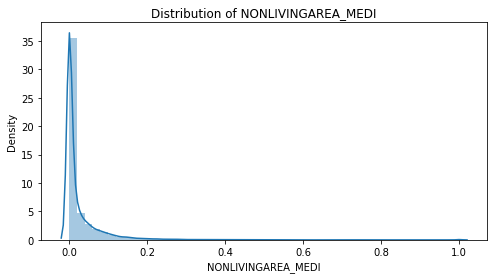

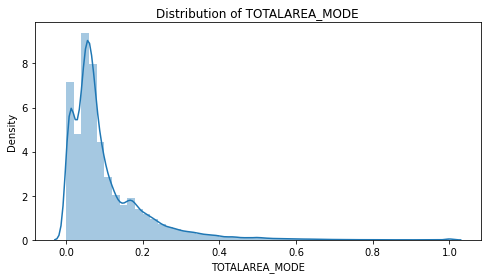

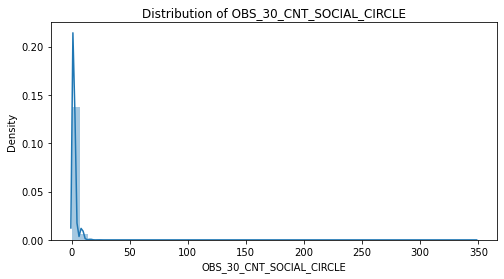

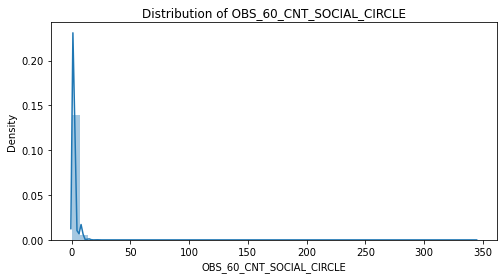

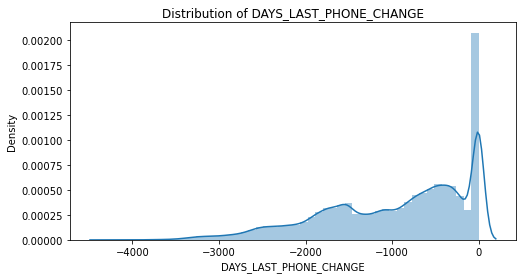

Graph of Numeric Variables was plotted.

****** Examination of Categorical Variables According to Target ******

                     Count  Ratio  TARGET_MEAN
NAME_CONTRACT_TYPE                            
Cash loans          278232  90.48         0.08
Revolving loans      29279   9.52         0.05





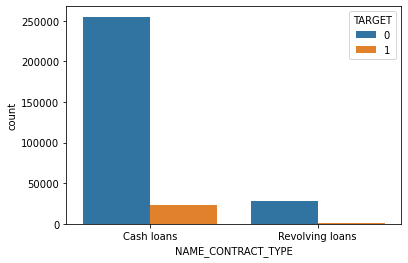




              Count  Ratio  TARGET_MEAN
CODE_GENDER                            
F            202448  65.83         0.07
M            105059  34.16         0.10
XNA               4   0.00         0.00





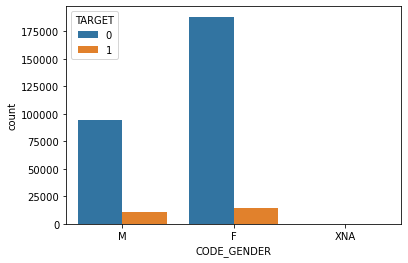




               Count  Ratio  TARGET_MEAN
FLAG_OWN_CAR                            
N             202924  65.99         0.09
Y             104587  34.01         0.07





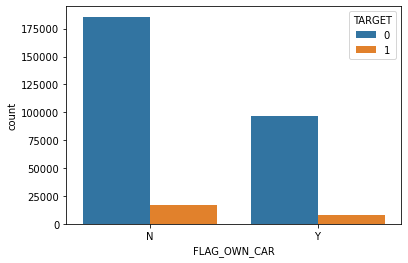




    Count  Ratio  TARGET_MEAN
N   94199  30.63         0.08
Y  213312  69.37         0.08





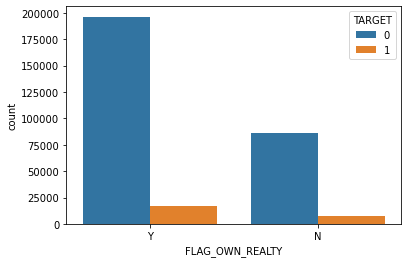




                  Count  Ratio  TARGET_MEAN
Children           3267   1.06         0.07
Family            40149  13.06         0.07
Other_B            1770   0.58         0.10
Spouse, partner   11370   3.70         0.08
Unaccompanied    248526  80.82         0.08
NaN                1292    nan          nan
Other_A             866   0.28         0.09
Group of people     271   0.09         0.08





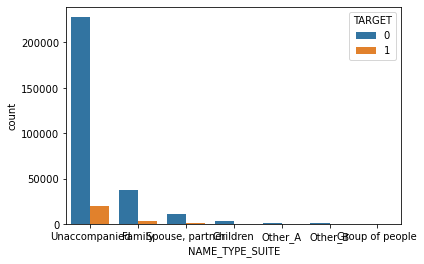




                       Count  Ratio  TARGET_MEAN
Businessman               10   0.00         0.00
Commercial associate   71617  23.29         0.07
Maternity leave            5   0.00         0.40
Pensioner              55362  18.00         0.05
State servant          21703   7.06         0.06
Student                   18   0.01         0.00
Unemployed                22   0.01         0.36
Working               158774  51.63         0.10





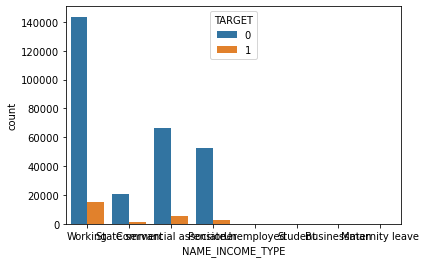




                                Count  Ratio  TARGET_MEAN
Academic degree                   164   0.05         0.02
Higher education                74863  24.34         0.05
Incomplete higher               10277   3.34         0.08
Lower secondary                  3816   1.24         0.11
Secondary / secondary special  218391  71.02         0.09





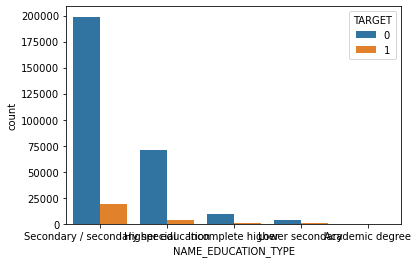




                       Count  Ratio  TARGET_MEAN
Civil marriage         29775   9.68         0.10
Married               196432  63.88         0.08
Separated              19770   6.43         0.08
Single / not married   45444  14.78         0.10
Unknown                    2   0.00         0.00
Widow                  16088   5.23         0.06





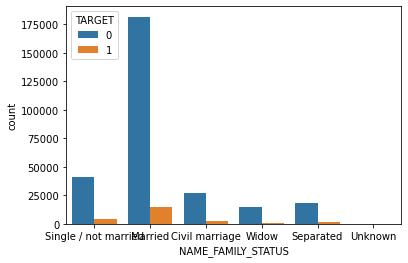




                      Count  Ratio  TARGET_MEAN
Co-op apartment        1122   0.36         0.08
House / apartment    272868  88.73         0.08
Municipal apartment   11183   3.64         0.09
Office apartment       2617   0.85         0.07
Rented apartment       4881   1.59         0.12
With parents          14840   4.83         0.12





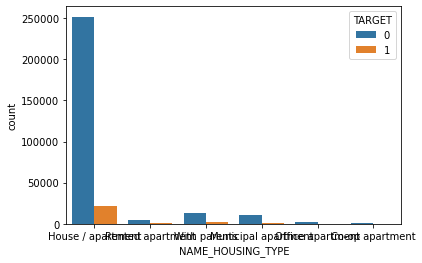




    Count  Ratio  TARGET_MEAN
0       1   0.00         0.00
1  307510 100.00         0.08





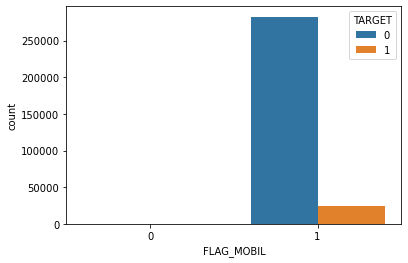




    Count  Ratio  TARGET_MEAN
0   55386  18.01         0.05
1  252125  81.99         0.09





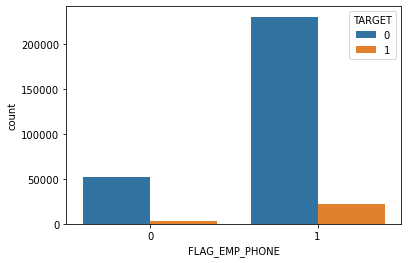




    Count  Ratio  TARGET_MEAN
0  246203  80.06         0.08
1   61308  19.94         0.10





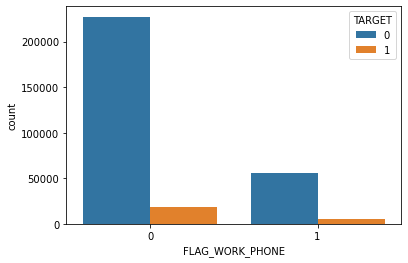




    Count  Ratio  TARGET_MEAN
0     574   0.19         0.08
1  306937  99.81         0.08





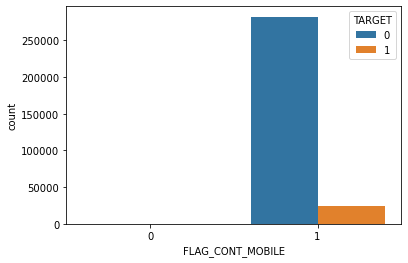




    Count  Ratio  TARGET_MEAN
0  221080  71.89         0.08
1   86431  28.11         0.07





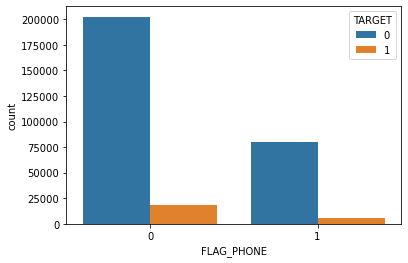




    Count  Ratio  TARGET_MEAN
0  290069  94.33         0.08
1   17442   5.67         0.08





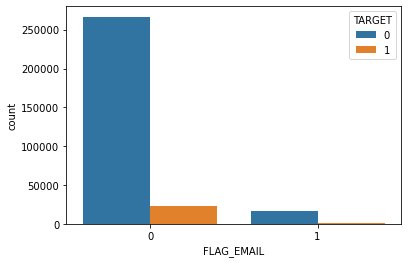




                       Count  Ratio  TARGET_MEAN
NaN                    96391    nan          nan
Laborers               55186  17.95         0.11
Sales staff            32102  10.44         0.10
Core staff             27570   8.97         0.06
Managers               21371   6.95         0.06
Drivers                18603   6.05         0.11
High skill tech staff  11380   3.70         0.06
Accountants             9813   3.19         0.05
Medicine staff          8537   2.78         0.07
Security staff          6721   2.19         0.11
Cooking staff           5946   1.93         0.10
Cleaning staff          4653   1.51         0.10
Private service staff   2652   0.86         0.07
Low-skill Laborers      2093   0.68         0.17
Waiters/barmen staff    1348   0.44         0.11
Secretaries             1305   0.42         0.07
Realty agents            751   0.24         0.08
HR staff                 563   0.18         0.06
IT staff                 526   0.17         0.06





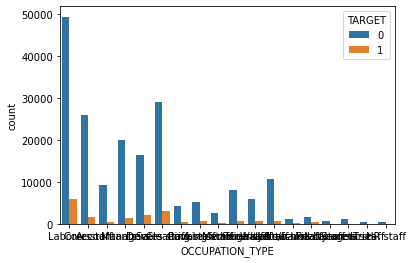




    Count  Ratio  TARGET_MEAN
1   32197  10.47         0.05
2  226984  73.81         0.08
3   48330  15.72         0.11





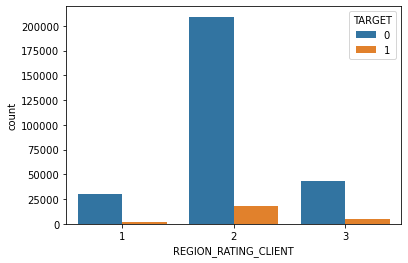




    Count  Ratio  TARGET_MEAN
1   34167  11.11         0.05
2  229484  74.63         0.08
3   43860  14.26         0.11





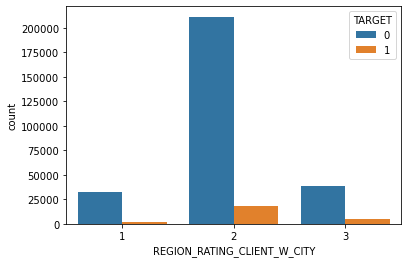




           Count  Ratio  TARGET_MEAN
FRIDAY     50338  16.37         0.08
MONDAY     50714  16.49         0.08
SATURDAY   33852  11.01         0.08
SUNDAY     16181   5.26         0.08
THURSDAY   50591  16.45         0.08
TUESDAY    53901  17.53         0.08
WEDNESDAY  51934  16.89         0.08





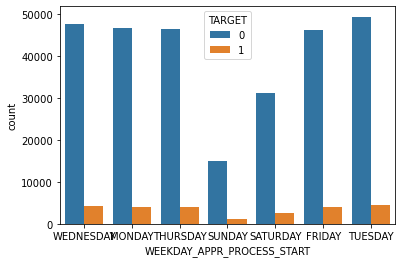




    Count  Ratio  TARGET_MEAN
0      40   0.01         0.15
1      86   0.03         0.08
2     305   0.10         0.10
3    1230   0.40         0.09
4    2090   0.68         0.08
5    3638   1.18         0.11
6    5842   1.90         0.11
7    9131   2.97         0.10
8   15127   4.92         0.09
9   27384   8.91         0.08
10  37722  12.27         0.08
11  37229  12.11         0.08
12  34233  11.13         0.08
13  30959  10.07         0.08
14  27682   9.00         0.08
15  24839   8.08         0.08
16  20385   6.63         0.07
17  14900   4.85         0.06
18   9049   2.94         0.07
19   3848   1.25         0.07
20   1196   0.39         0.07
21    405   0.13         0.06
22    150   0.05         0.10
23     41   0.01         0.12





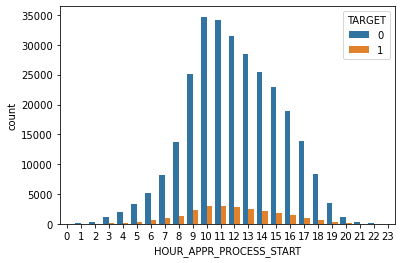




    Count  Ratio  TARGET_MEAN
0  302854  98.49         0.08
1    4657   1.51         0.09





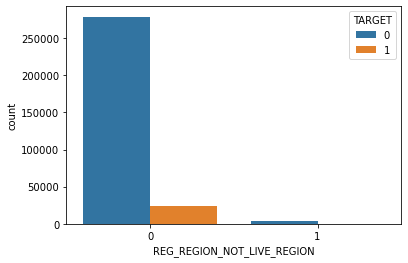




    Count  Ratio  TARGET_MEAN
0  291899  94.92         0.08
1   15612   5.08         0.09





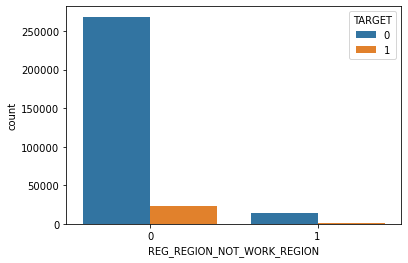




    Count  Ratio  TARGET_MEAN
0  295008  95.93         0.08
1   12503   4.07         0.08





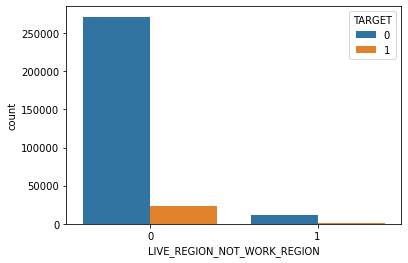




    Count  Ratio  TARGET_MEAN
0  283472  92.18         0.08
1   24039   7.82         0.12





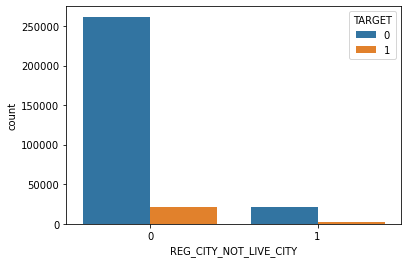




    Count  Ratio  TARGET_MEAN
0  236644  76.95         0.07
1   70867  23.05         0.11





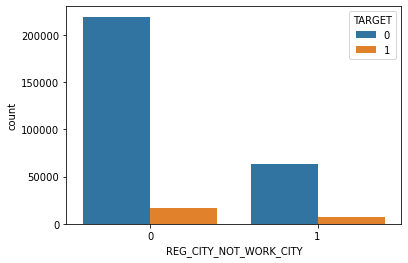




    Count  Ratio  TARGET_MEAN
0  252296  82.04         0.08
1   55215  17.96         0.10





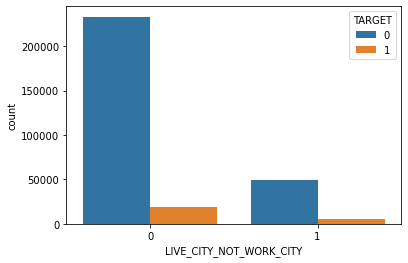




                        Count  Ratio  TARGET_MEAN
Advertising               429   0.14         0.08
Agriculture              2454   0.80         0.10
Bank                     2507   0.82         0.05
Business Entity Type 1   5984   1.95         0.08
Business Entity Type 2  10553   3.43         0.09
Business Entity Type 3  67992  22.11         0.09
Cleaning                  260   0.08         0.11
Construction             6721   2.19         0.12
Culture                   379   0.12         0.06
Electricity               950   0.31         0.07
Emergency                 560   0.18         0.07
Government              10404   3.38         0.07
Hotel                     966   0.31         0.06
Housing                  2958   0.96         0.08
Industry: type 1         1039   0.34         0.11
Industry: type 10         109   0.04         0.06
Industry: type 11        2704   0.88         0.09
Industry: type 12         369   0.12         0.04
Industry: type 13          67   0.02         0.

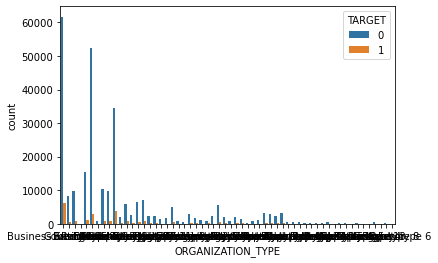




                        Count  Ratio  TARGET_MEAN
NaN                    210295    nan          nan
reg oper account        73830  24.01         0.07
reg oper spec account   12080   3.93         0.07
not specified            5687   1.85         0.08
org spec account         5619   1.83         0.06





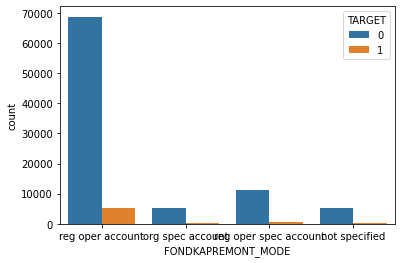




                   Count  Ratio  TARGET_MEAN
NaN               154297    nan          nan
block of flats    150503  48.94         0.07
specific housing    1499   0.49         0.10
terraced house      1212   0.39         0.08





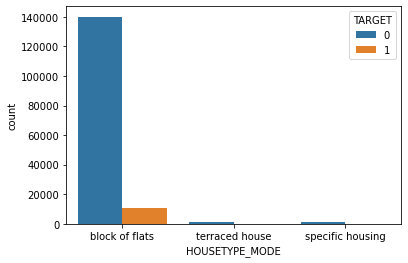




               Count  Ratio  TARGET_MEAN
NaN           156341    nan          nan
Panel          66040  21.48         0.06
Stone, brick   64815  21.08         0.07
Block           9253   3.01         0.07
Wooden          5362   1.74         0.10
Mixed           2296   0.75         0.08
Monolithic      1779   0.58         0.05
Others          1625   0.53         0.08





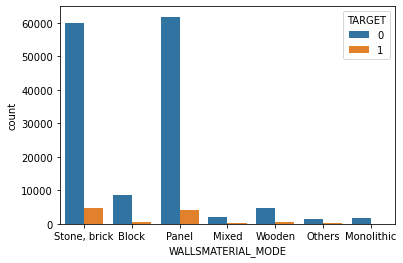




      Count  Ratio  TARGET_MEAN
No   159428  51.84         0.07
NaN  145755    nan          nan
Yes    2328   0.76         0.10





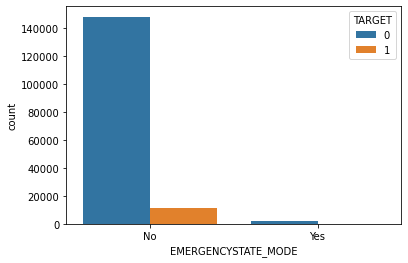




        Count  Ratio  TARGET_MEAN
0.00   271324  88.23         0.08
1.00    28328   9.21         0.10
2.00     5323   1.73         0.12
3.00     1192   0.39         0.13
4.00      253   0.08         0.14
5.00       56   0.02         0.14
6.00       11   0.00         0.09
7.00        1   0.00         0.00
8.00        1   0.00         0.00
34.00       1   0.00         0.00
nan      1021    nan          nan





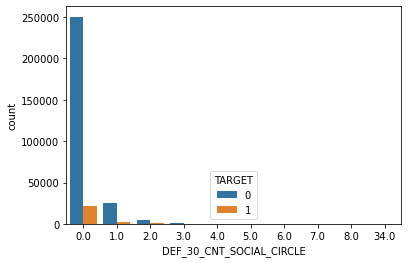




        Count  Ratio  TARGET_MEAN
0.00   280721  91.29         0.08
1.00    21841   7.10         0.11
2.00     3170   1.03         0.12
3.00      598   0.19         0.16
4.00      135   0.04         0.11
5.00       20   0.01         0.15
6.00        3   0.00         0.00
7.00        1   0.00         0.00
24.00       1   0.00         0.00
nan      1021    nan          nan





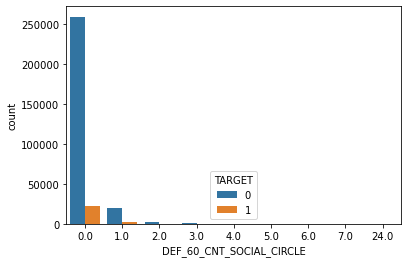




    Count  Ratio  TARGET_MEAN
0  307498 100.00         0.08
1      13   0.00         0.31





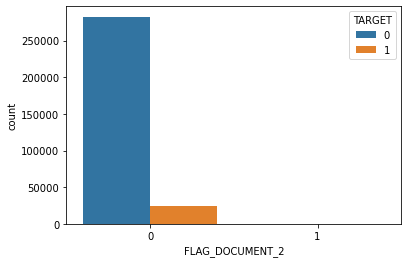




    Count  Ratio  TARGET_MEAN
0   89171  29.00         0.06
1  218340  71.00         0.09





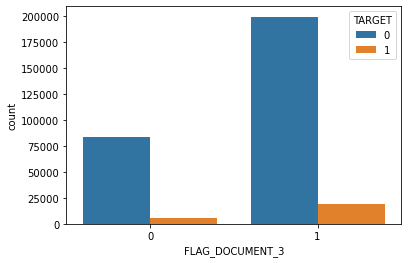




    Count  Ratio  TARGET_MEAN
0  307486  99.99         0.08
1      25   0.01         0.00





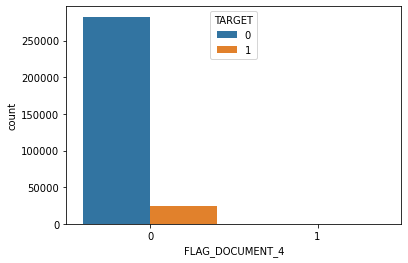




    Count  Ratio  TARGET_MEAN
0  302863  98.49         0.08
1    4648   1.51         0.08





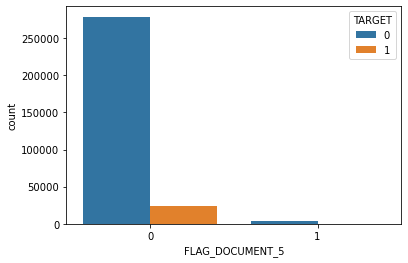




    Count  Ratio  TARGET_MEAN
0  280433  91.19         0.08
1   27078   8.81         0.06





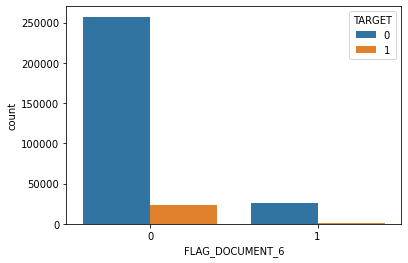




    Count  Ratio  TARGET_MEAN
0  307452  99.98         0.08
1      59   0.02         0.05





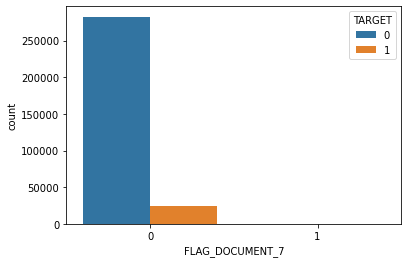




    Count  Ratio  TARGET_MEAN
0  282487  91.86         0.08
1   25024   8.14         0.07





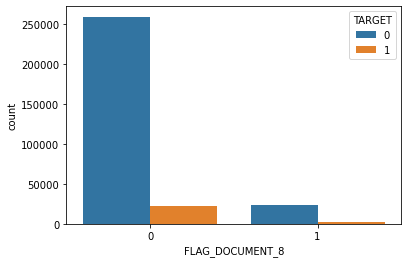




    Count  Ratio  TARGET_MEAN
0  306313  99.61         0.08
1    1198   0.39         0.06





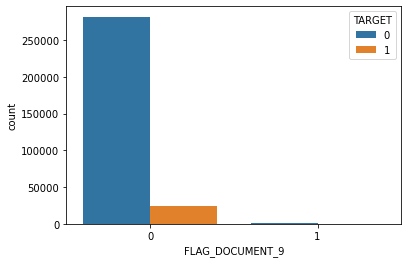




    Count  Ratio  TARGET_MEAN
0  307504 100.00         0.08
1       7   0.00         0.00





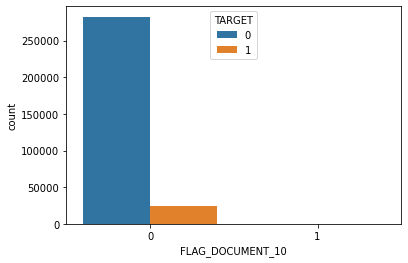




    Count  Ratio  TARGET_MEAN
0  306308  99.61         0.08
1    1203   0.39         0.06





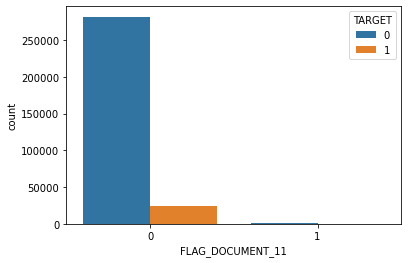




    Count  Ratio  TARGET_MEAN
0  307509 100.00         0.08
1       2   0.00         0.00





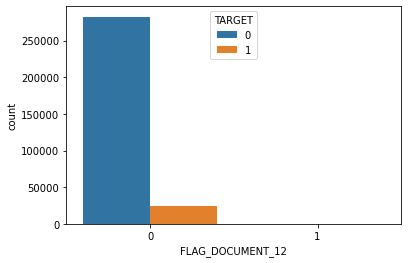




    Count  Ratio  TARGET_MEAN
0  306427  99.65         0.08
1    1084   0.35         0.03





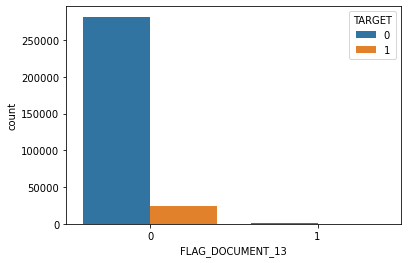




    Count  Ratio  TARGET_MEAN
0  306608  99.71         0.08
1     903   0.29         0.03





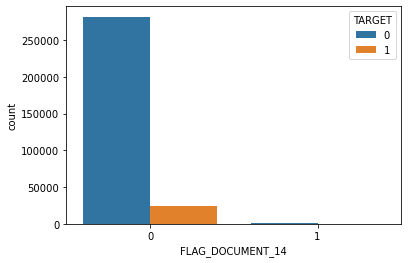




    Count  Ratio  TARGET_MEAN
0  307139  99.88         0.08
1     372   0.12         0.03





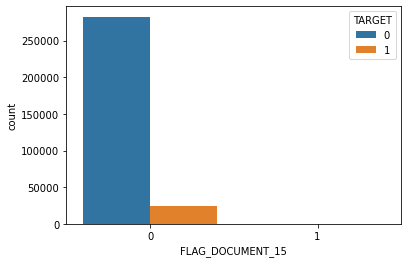




    Count  Ratio  TARGET_MEAN
0  304458  99.01         0.08
1    3053   0.99         0.05





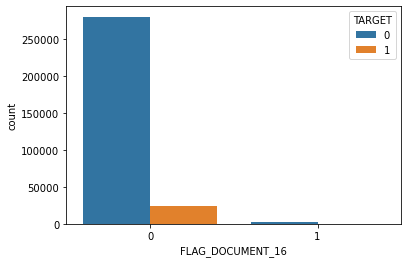




    Count  Ratio  TARGET_MEAN
0  307429  99.97         0.08
1      82   0.03         0.02





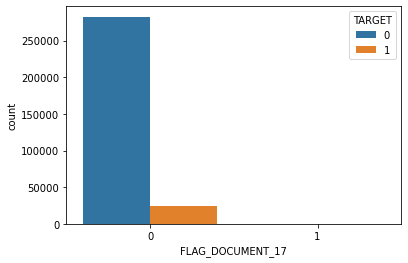




    Count  Ratio  TARGET_MEAN
0  305011  99.19         0.08
1    2500   0.81         0.06





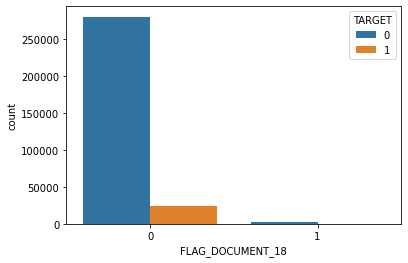




    Count  Ratio  TARGET_MEAN
0  307328  99.94         0.08
1     183   0.06         0.07





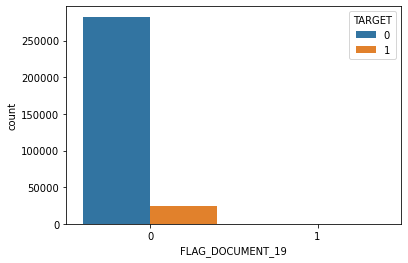




    Count  Ratio  TARGET_MEAN
0  307355  99.95         0.08
1     156   0.05         0.08





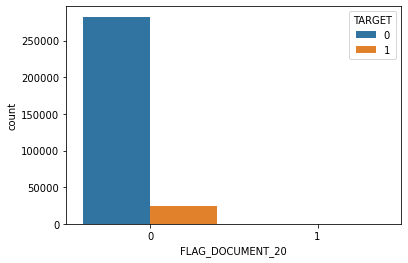




    Count  Ratio  TARGET_MEAN
0  307408  99.97         0.08
1     103   0.03         0.14





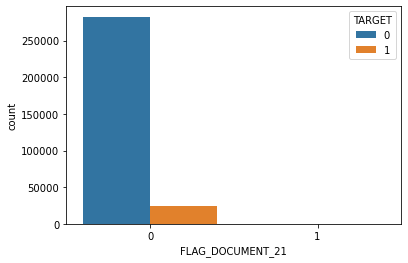




       Count  Ratio  TARGET_MEAN
0.00  264366  85.97         0.08
1.00    1560   0.51         0.08
2.00      56   0.02         0.11
3.00       9   0.00         0.00
4.00       1   0.00         0.00
nan    41519    nan          nan





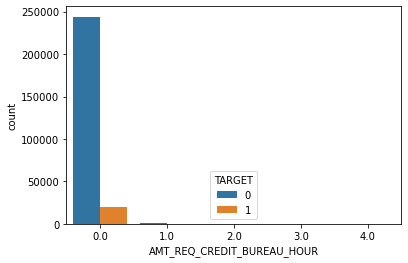




       Count  Ratio  TARGET_MEAN
0.00  264503  86.01         0.08
1.00    1292   0.42         0.10
2.00     106   0.03         0.10
3.00      45   0.01         0.04
4.00      26   0.01         0.12
5.00       9   0.00         0.00
6.00       8   0.00         0.00
8.00       1   0.00         0.00
9.00       2   0.00         0.00
nan    41519    nan          nan





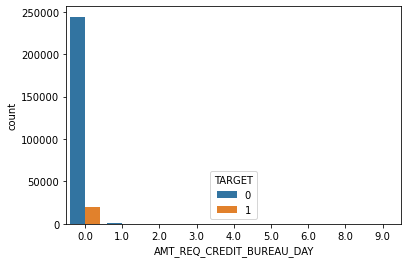




       Count  Ratio  TARGET_MEAN
0.00  257456  83.72         0.08
1.00    8208   2.67         0.08
2.00     199   0.06         0.10
3.00      58   0.02         0.07
4.00      34   0.01         0.12
5.00      10   0.00         0.10
6.00      20   0.01         0.05
7.00       2   0.00         0.00
8.00       5   0.00         0.00
nan    41519    nan          nan





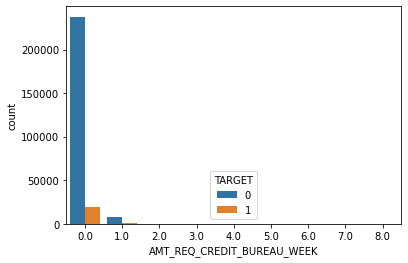




        Count  Ratio  TARGET_MEAN
0.00   222233  72.27         0.08
1.00    33147  10.78         0.08
2.00     5386   1.75         0.07
3.00     1991   0.65         0.05
4.00     1076   0.35         0.06
5.00      602   0.20         0.07
6.00      343   0.11         0.05
7.00      298   0.10         0.06
8.00      185   0.06         0.03
9.00      206   0.07         0.04
10.00     132   0.04         0.08
11.00     119   0.04         0.03
12.00      77   0.03         0.01
13.00      72   0.02         0.04
14.00      40   0.01         0.03
15.00      35   0.01         0.03
16.00      23   0.01         0.00
17.00      14   0.00         0.07
18.00       6   0.00         0.00
19.00       3   0.00         0.00
22.00       1   0.00         0.00
23.00       1   0.00         0.00
24.00       1   0.00         0.00
27.00       1   0.00         0.00
nan     41519    nan          nan





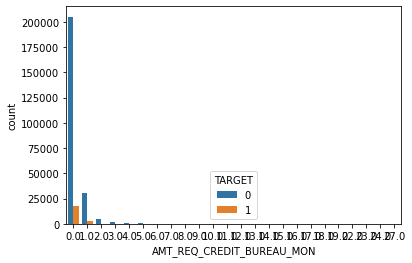




         Count  Ratio  TARGET_MEAN
0.00    215417  70.05         0.08
1.00     33862  11.01         0.07
2.00     14412   4.69         0.08
3.00      1717   0.56         0.07
4.00       476   0.15         0.12
5.00        64   0.02         0.09
6.00        28   0.01         0.25
7.00         7   0.00         0.14
8.00         7   0.00         0.00
19.00        1   0.00         1.00
261.00       1   0.00         0.00
nan      41519    nan          nan





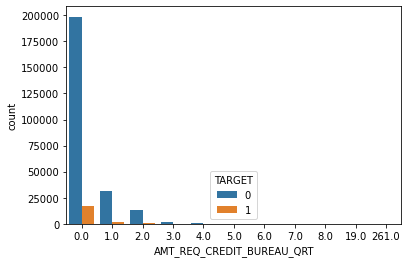




       Count  Ratio  TARGET_MEAN
0.00   71801  23.35         0.07
1.00   63405  20.62         0.07
2.00   50192  16.32         0.08
3.00   33628  10.94         0.08
4.00   20714   6.74         0.08
5.00   12052   3.92         0.08
6.00    6967   2.27         0.09
7.00    3869   1.26         0.09
8.00    2127   0.69         0.09
9.00    1096   0.36         0.11
10.00     22   0.01         0.14
11.00     31   0.01         0.06
12.00     30   0.01         0.07
13.00     19   0.01         0.05
14.00     10   0.00         0.30
15.00      6   0.00         0.00
16.00      3   0.00         0.33
17.00      7   0.00         0.00
18.00      4   0.00         0.00
19.00      4   0.00         0.00
20.00      1   0.00         0.00
21.00      1   0.00         0.00
22.00      1   0.00         1.00
23.00      1   0.00         0.00
25.00      1   0.00         0.00
nan    41519    nan          nan





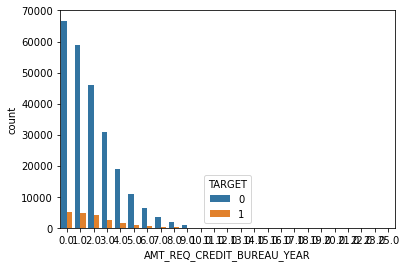




****** Examination of Numerical Variables According to Target ******

CNT_CHILDREN

         Count  TARGET_MEAN
TARGET                     
0       282686         0.41
1        24825         0.46


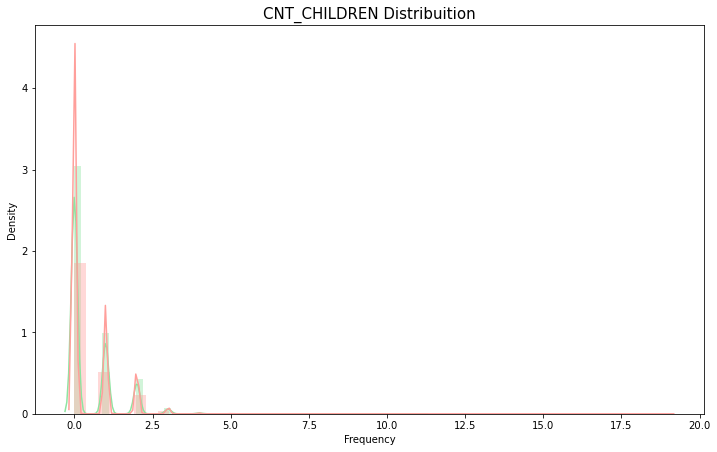




AMT_INCOME_TOTAL

         Count  TARGET_MEAN
TARGET                     
0       282686    169077.72
1        24825    165611.76


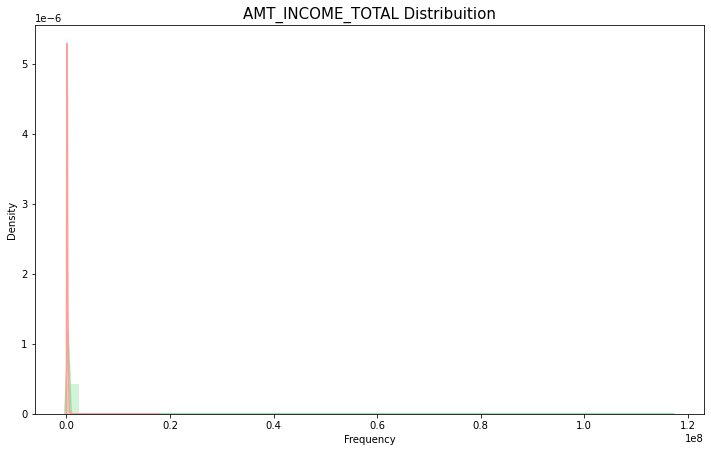




AMT_CREDIT

         Count  TARGET_MEAN
TARGET                     
0       282686    602648.28
1        24825    557778.53


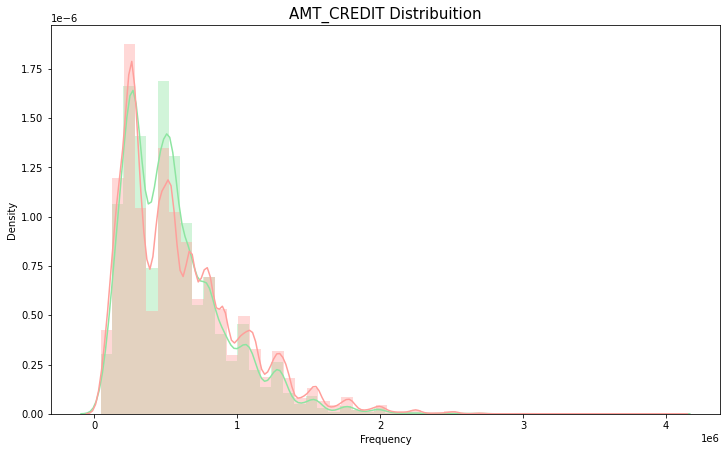




AMT_ANNUITY

         Count  TARGET_MEAN
TARGET                     
0       282674     27163.62
1        24825     26481.74


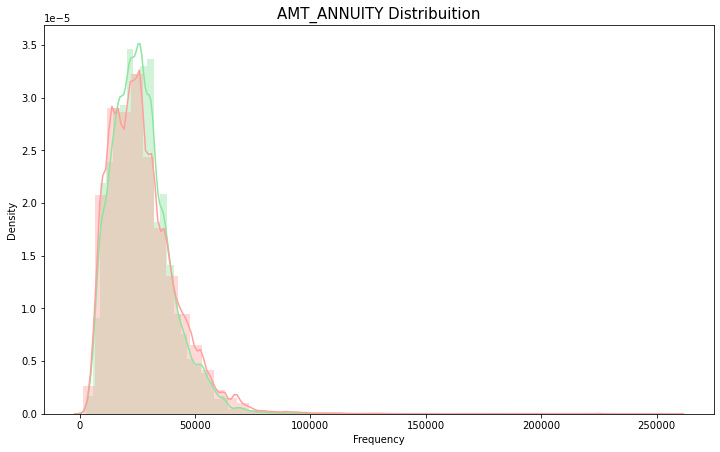




AMT_GOODS_PRICE

         Count  TARGET_MEAN
TARGET                     
0       282429    542736.80
1        24804    488972.41


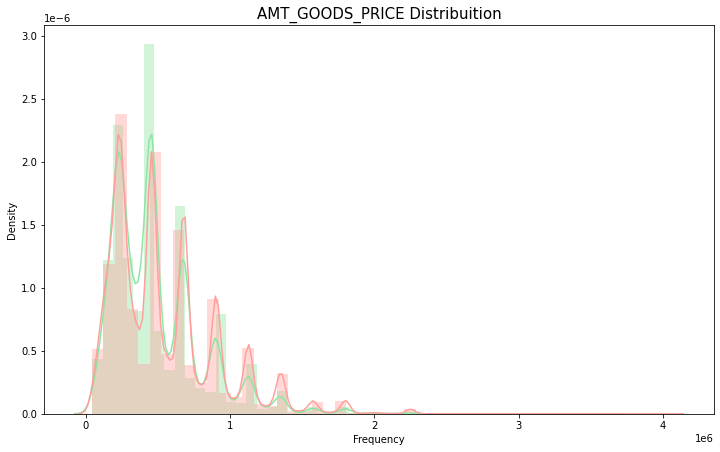




REGION_POPULATION_RELATIVE

         Count  TARGET_MEAN
TARGET                     
0       282686         0.02
1        24825         0.02


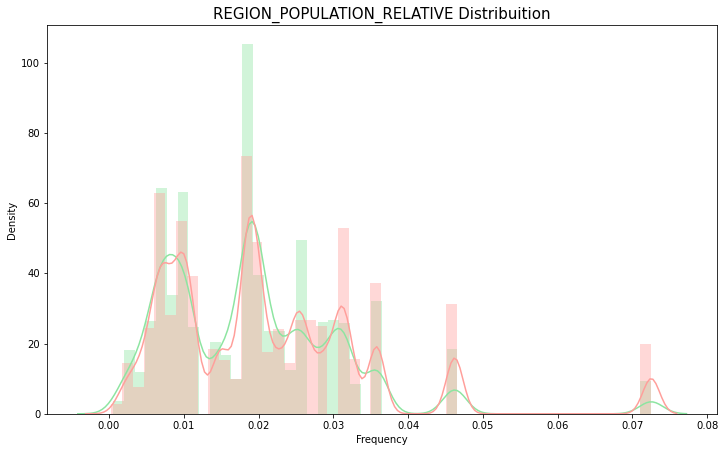




DAYS_BIRTH

         Count  TARGET_MEAN
TARGET                     
0       282686    -16138.18
1        24825    -14884.83


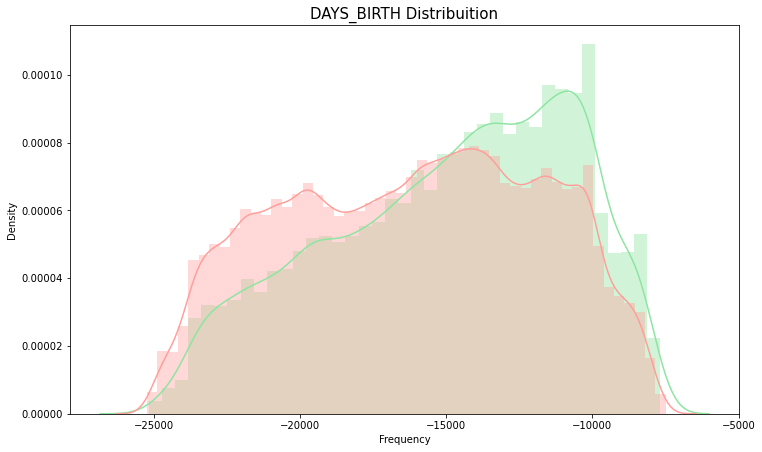




DAYS_EMPLOYED

         Count  TARGET_MEAN
TARGET                     
0       282686     65696.15
1        24825     42394.68


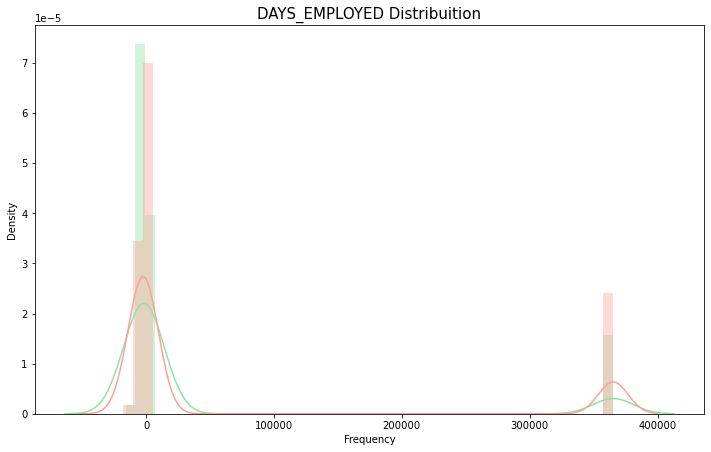




DAYS_REGISTRATION

         Count  TARGET_MEAN
TARGET                     
0       282686     -5029.94
1        24825     -4487.13


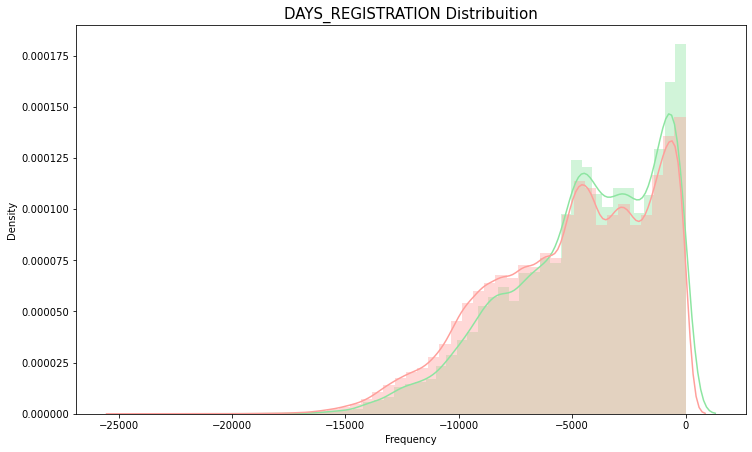




DAYS_ID_PUBLISH

         Count  TARGET_MEAN
TARGET                     
0       282686     -3017.22
1        24825     -2732.10


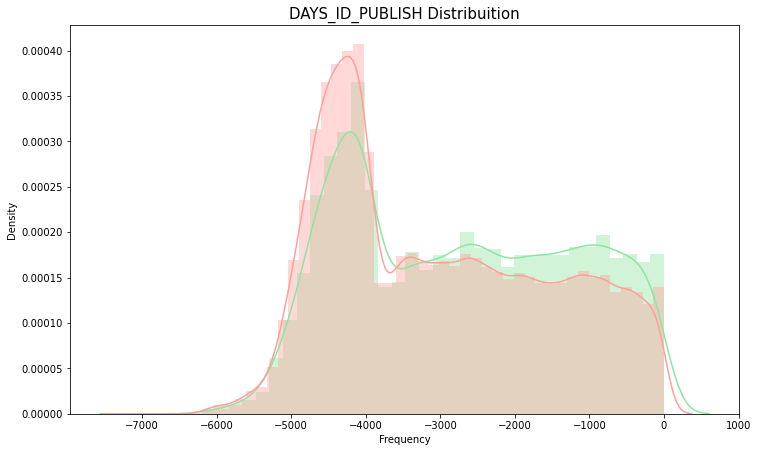




OWN_CAR_AGE

        Count  TARGET_MEAN
TARGET                    
0       97006        11.94
1        7576        13.67


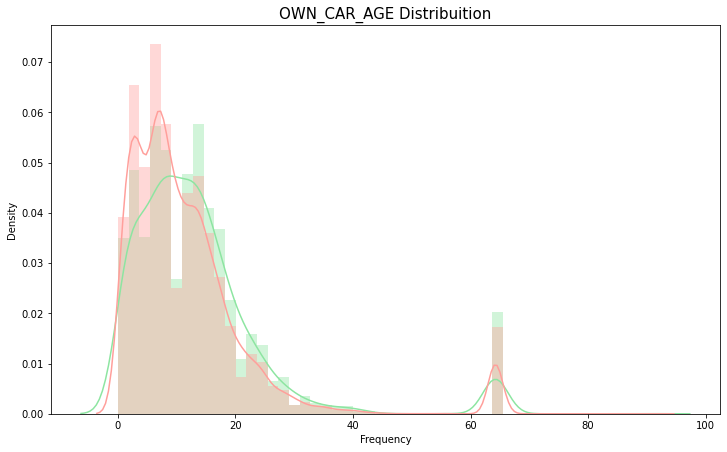




CNT_FAM_MEMBERS

         Count  TARGET_MEAN
TARGET                     
0       282684         2.15
1        24825         2.18


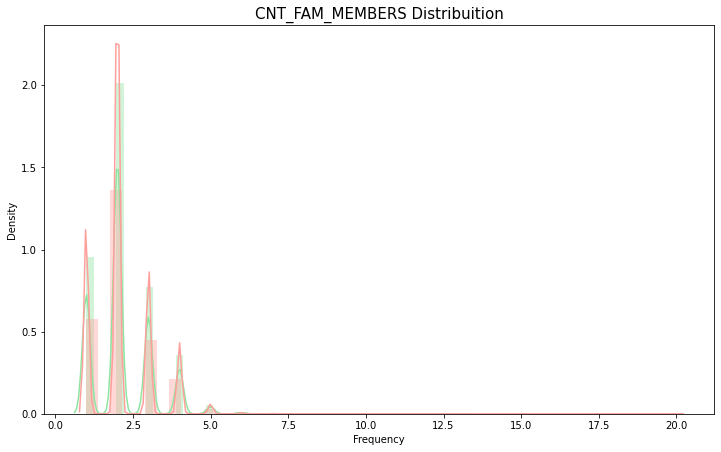




EXT_SOURCE_1

         Count  TARGET_MEAN
TARGET                     
0       124079         0.51
1        10054         0.39


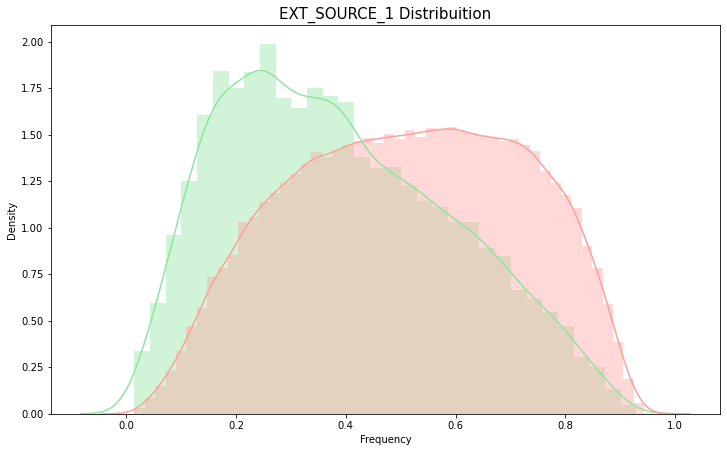




EXT_SOURCE_2

         Count  TARGET_MEAN
TARGET                     
0       282078         0.52
1        24773         0.41


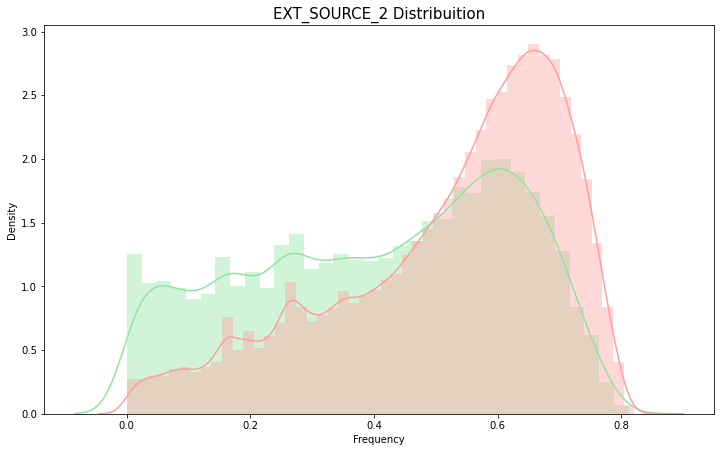




EXT_SOURCE_3

         Count  TARGET_MEAN
TARGET                     
0       227398         0.52
1        19148         0.39


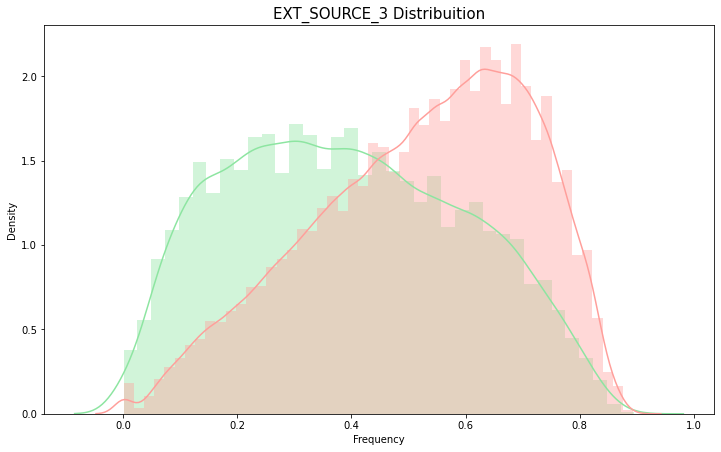




APARTMENTS_AVG

         Count  TARGET_MEAN
TARGET                     
0       140910         0.12
1        10540         0.11


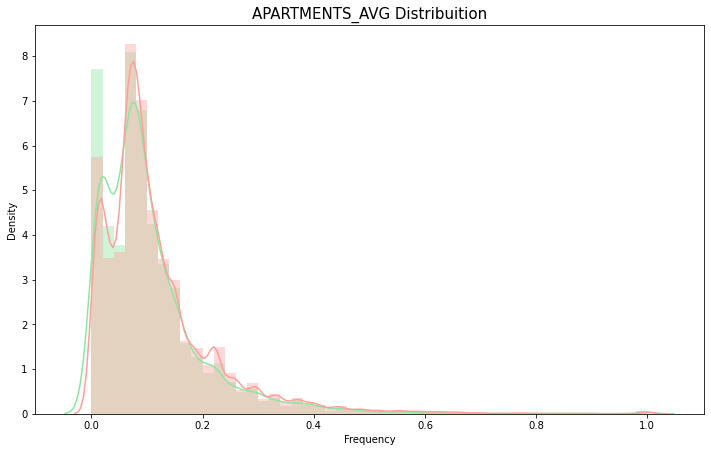




BASEMENTAREA_AVG

         Count  TARGET_MEAN
TARGET                     
0       118781         0.09
1         8787         0.08


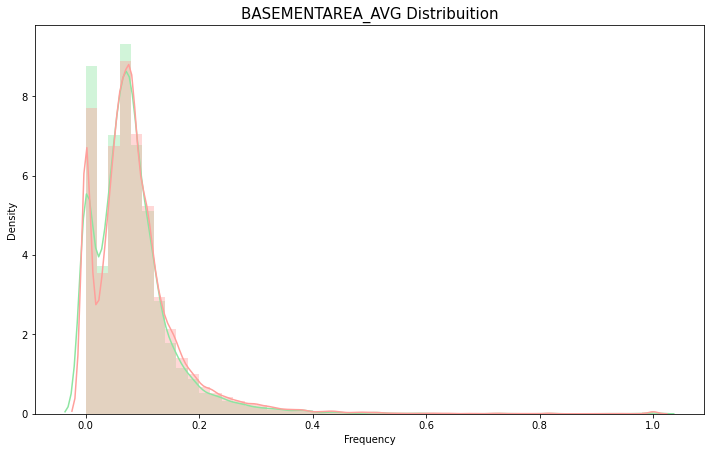




YEARS_BEGINEXPLUATATION_AVG

         Count  TARGET_MEAN
TARGET                     
0       146487         0.98
1        11017         0.98


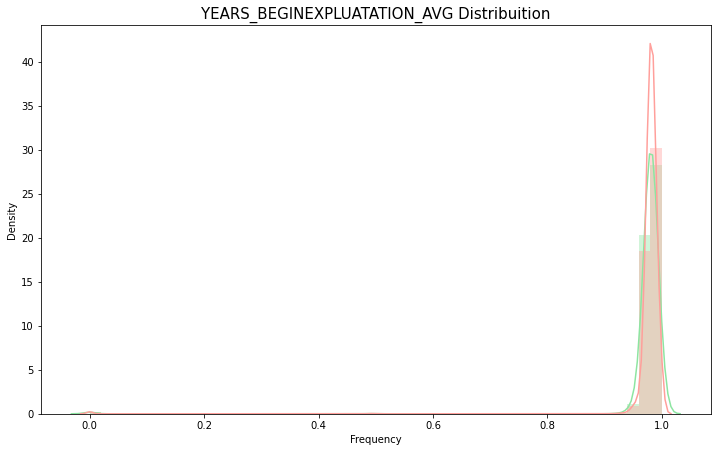




YEARS_BUILD_AVG

        Count  TARGET_MEAN
TARGET                    
0       95949         0.75
1        7074         0.74


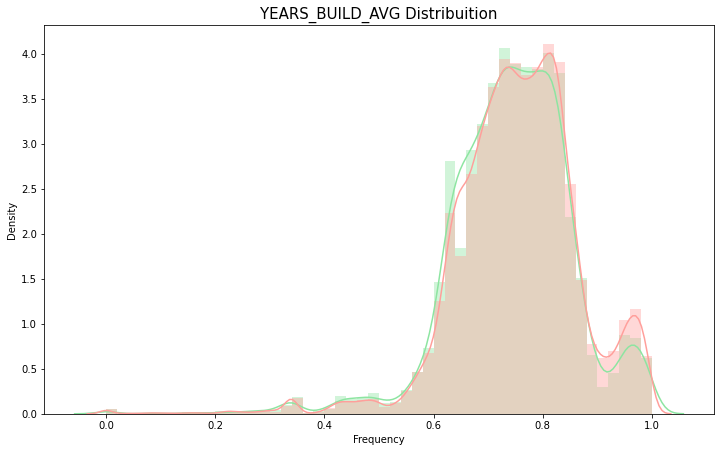




COMMONAREA_AVG

        Count  TARGET_MEAN
TARGET                    
0       86244         0.05
1        6402         0.04


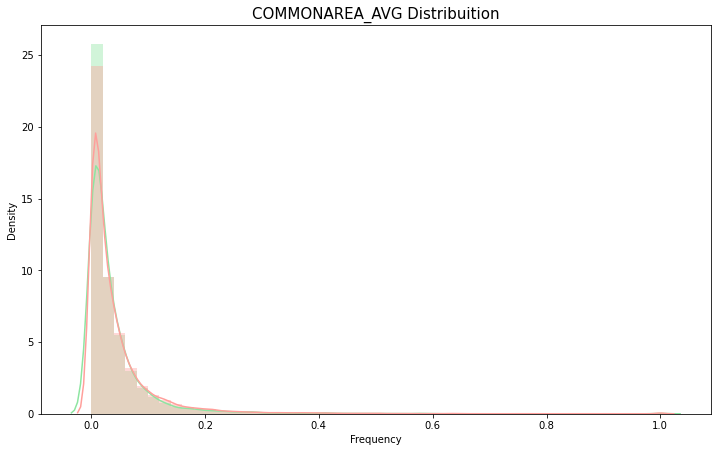




ELEVATORS_AVG

         Count  TARGET_MEAN
TARGET                     
0       133710         0.08
1         9910         0.06


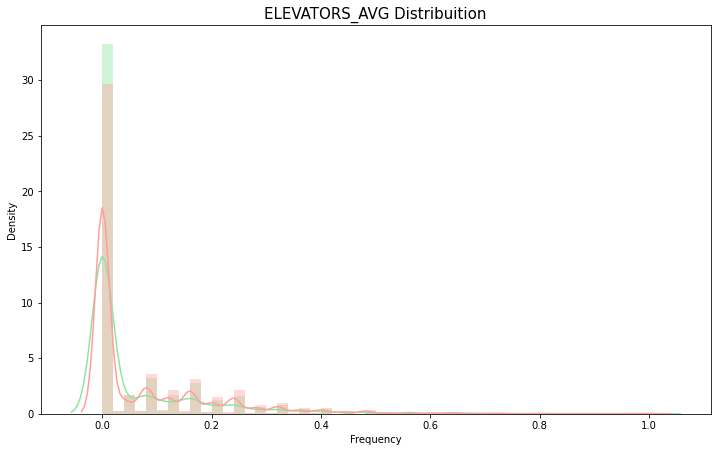




ENTRANCES_AVG

         Count  TARGET_MEAN
TARGET                     
0       142069         0.15
1        10614         0.14


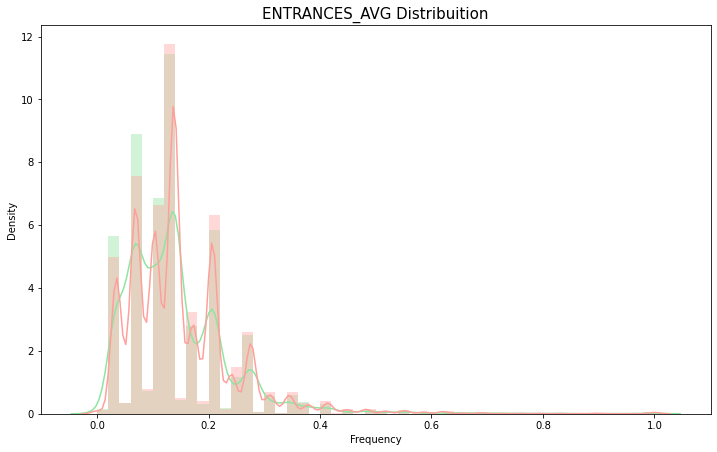




FLOORSMAX_AVG

         Count  TARGET_MEAN
TARGET                     
0       143730         0.23
1        10761         0.20


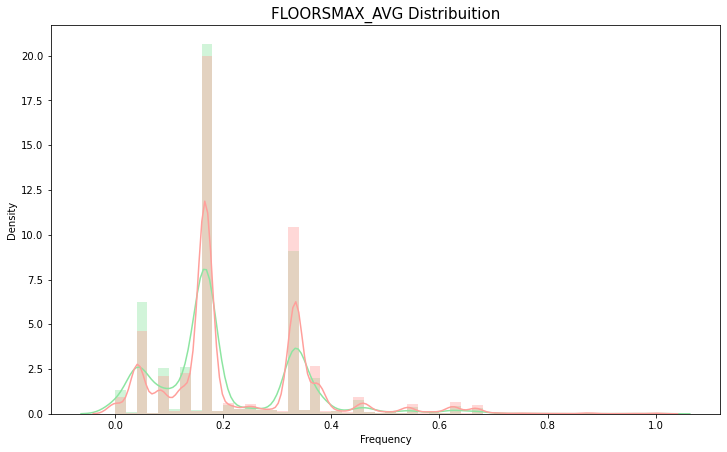




FLOORSMIN_AVG

        Count  TARGET_MEAN
TARGET                    
0       92052         0.23
1        6817         0.21


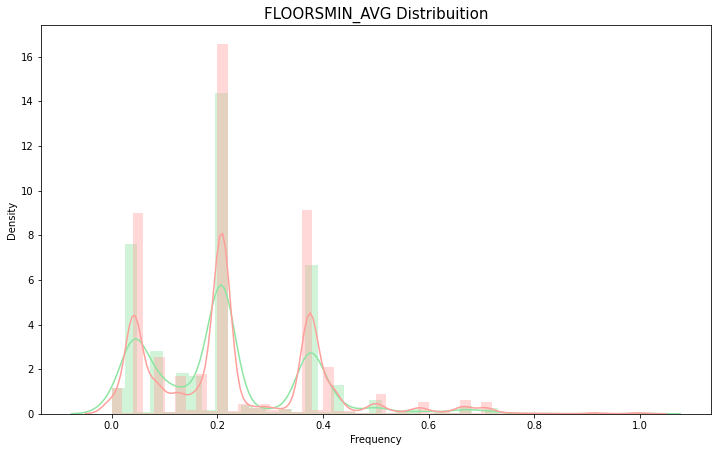




LANDAREA_AVG

         Count  TARGET_MEAN
TARGET                     
0       116200         0.07
1         8721         0.06


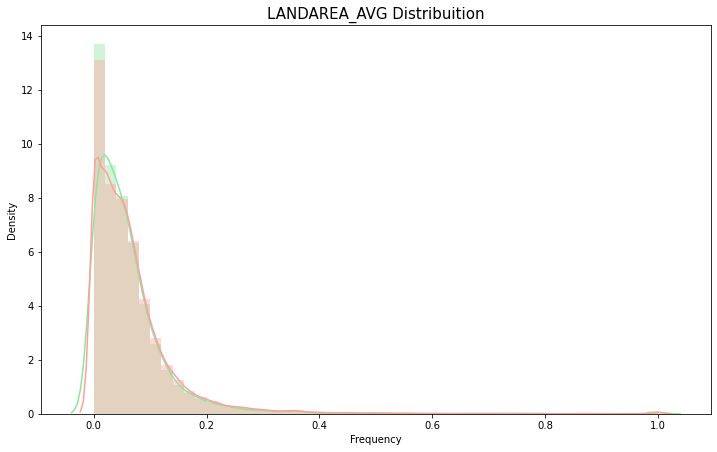




LIVINGAPARTMENTS_AVG

        Count  TARGET_MEAN
TARGET                    
0       90609         0.10
1        6703         0.09


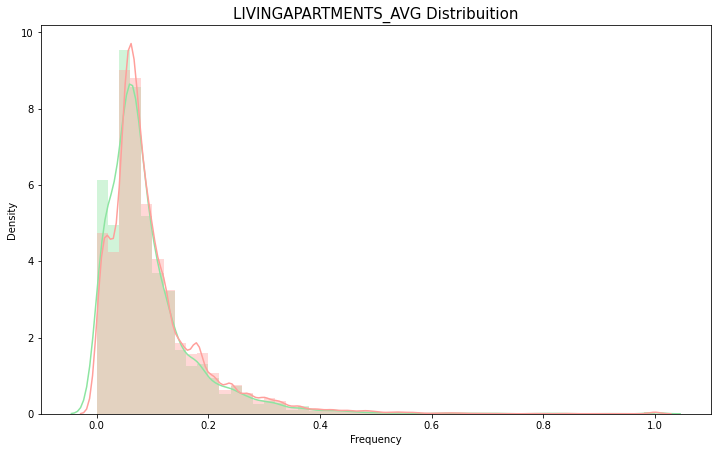




LIVINGAREA_AVG

         Count  TARGET_MEAN
TARGET                     
0       142447         0.11
1        10714         0.09


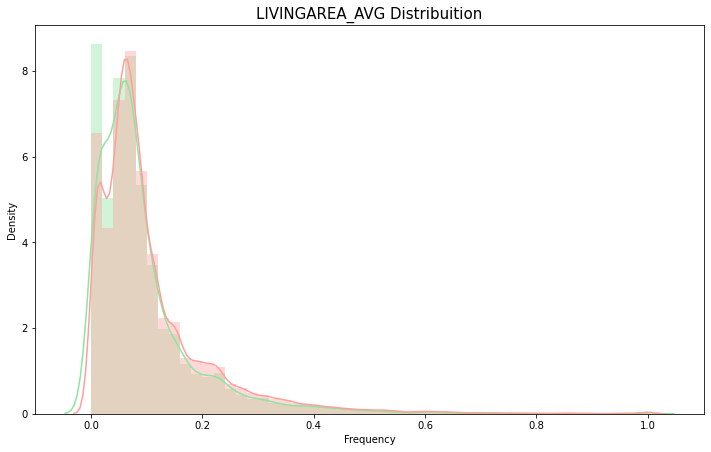




NONLIVINGAPARTMENTS_AVG

        Count  TARGET_MEAN
TARGET                    
0       87499         0.01
1        6498         0.01


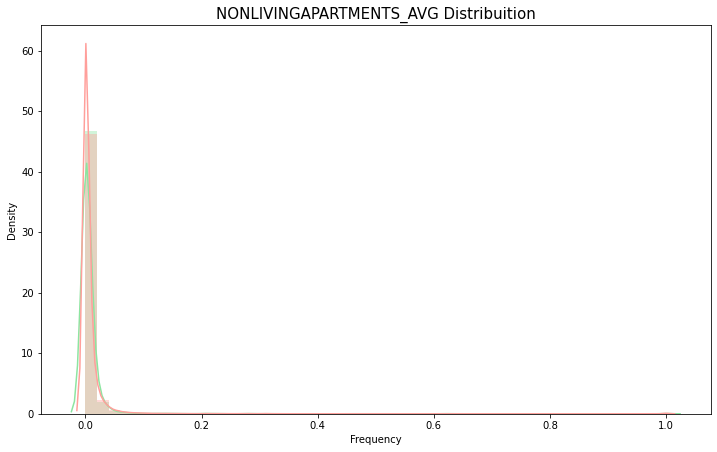




NONLIVINGAREA_AVG

         Count  TARGET_MEAN
TARGET                     
0       128334         0.03
1         9495         0.02


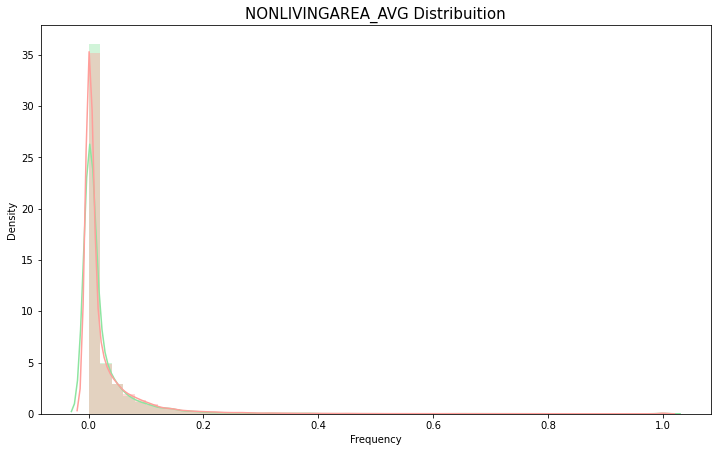




APARTMENTS_MODE

         Count  TARGET_MEAN
TARGET                     
0       140910         0.12
1        10540         0.10


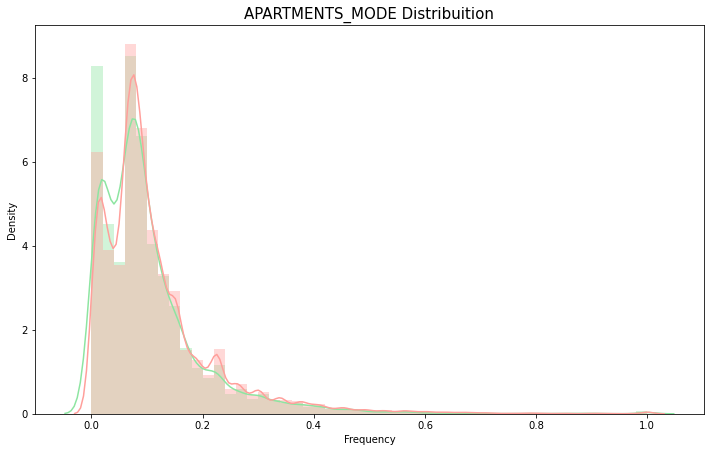




BASEMENTAREA_MODE

         Count  TARGET_MEAN
TARGET                     
0       118781         0.09
1         8787         0.08


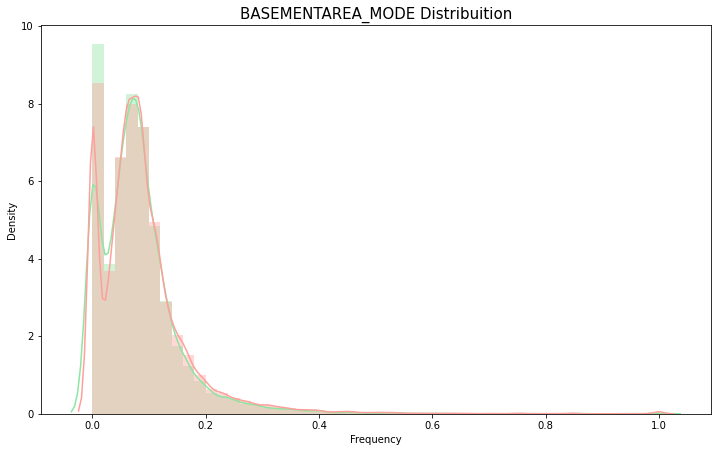




YEARS_BEGINEXPLUATATION_MODE

         Count  TARGET_MEAN
TARGET                     
0       146487         0.98
1        11017         0.97


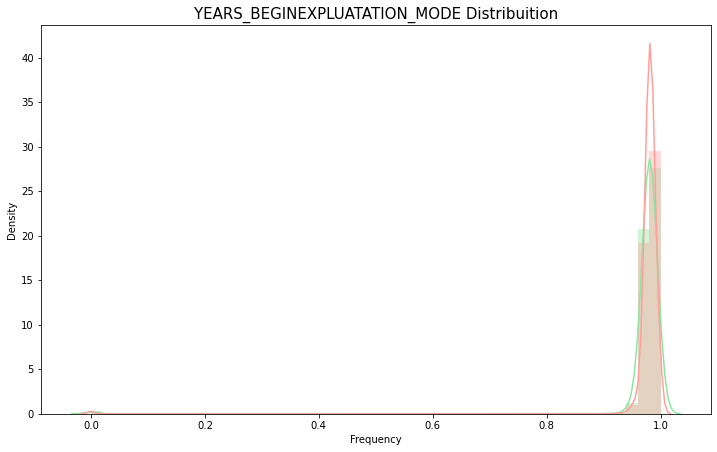




YEARS_BUILD_MODE

        Count  TARGET_MEAN
TARGET                    
0       95949         0.76
1        7074         0.75


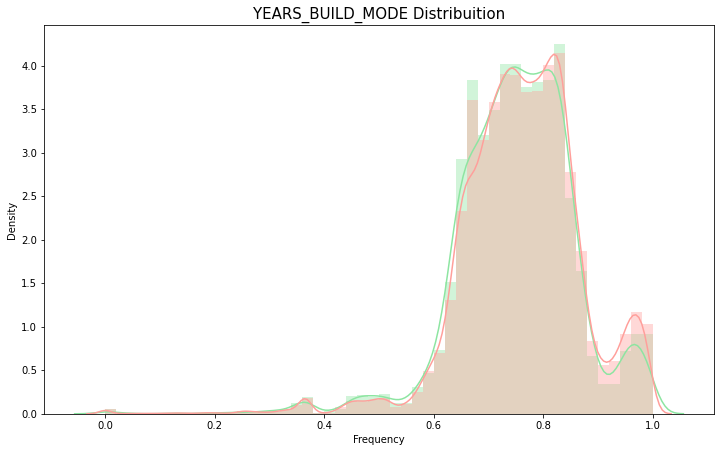




COMMONAREA_MODE

        Count  TARGET_MEAN
TARGET                    
0       86244         0.04
1        6402         0.04


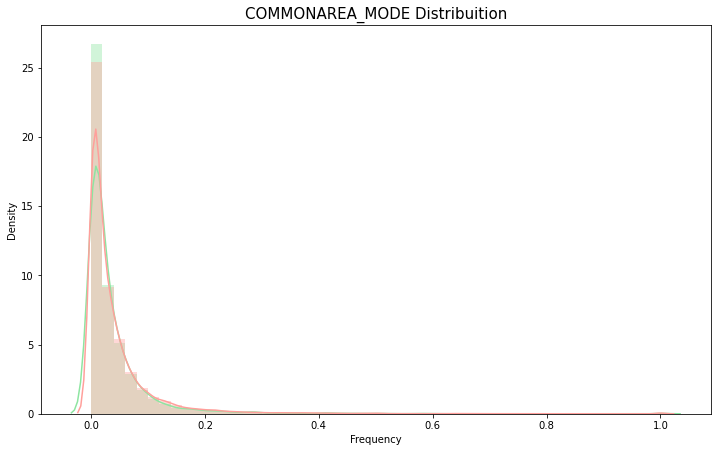




ELEVATORS_MODE

         Count  TARGET_MEAN
TARGET                     
0       133710         0.08
1         9910         0.06


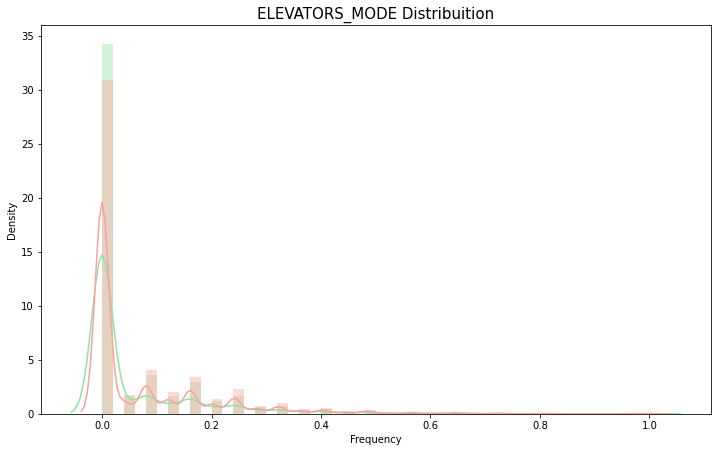




ENTRANCES_MODE

         Count  TARGET_MEAN
TARGET                     
0       142069         0.15
1        10614         0.14


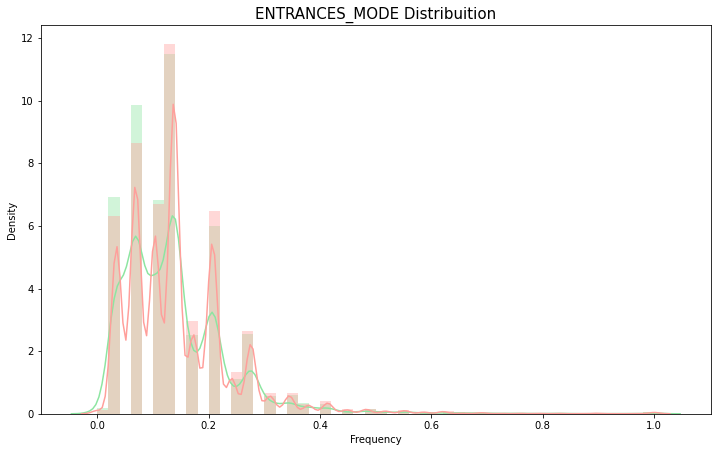




FLOORSMAX_MODE

         Count  TARGET_MEAN
TARGET                     
0       143730         0.22
1        10761         0.20


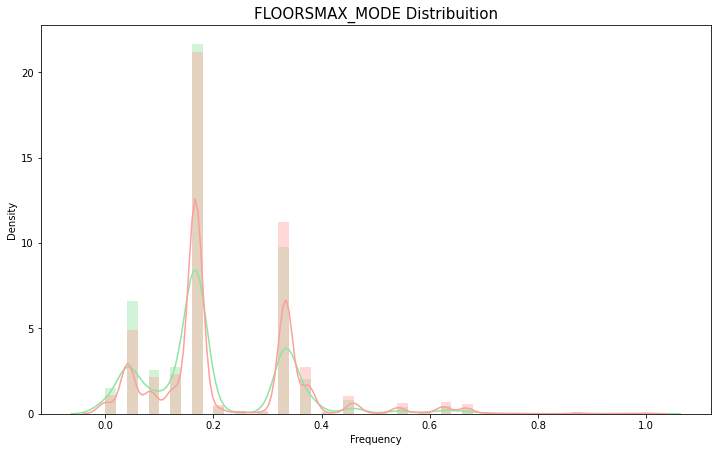




FLOORSMIN_MODE

        Count  TARGET_MEAN
TARGET                    
0       92052         0.23
1        6817         0.21


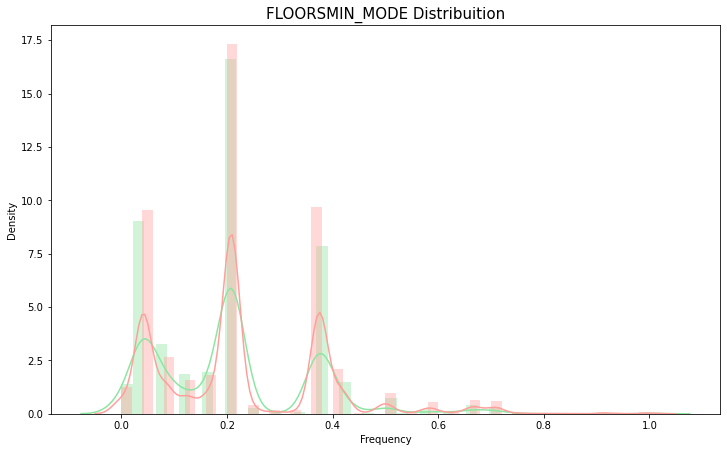




LANDAREA_MODE

         Count  TARGET_MEAN
TARGET                     
0       116200         0.07
1         8721         0.06


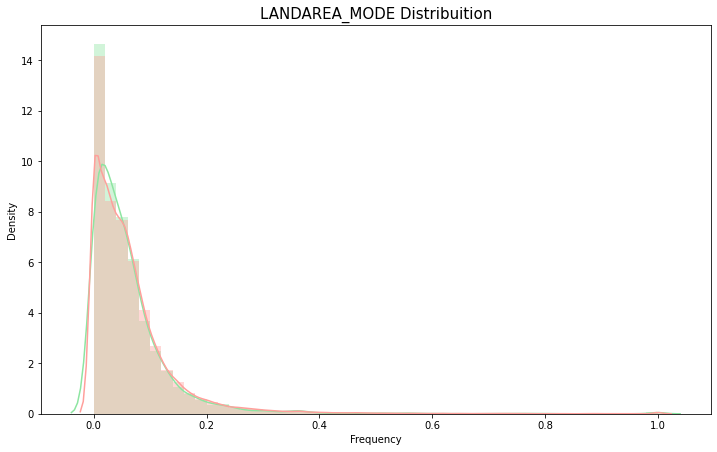




LIVINGAPARTMENTS_MODE

        Count  TARGET_MEAN
TARGET                    
0       90609         0.11
1        6703         0.10


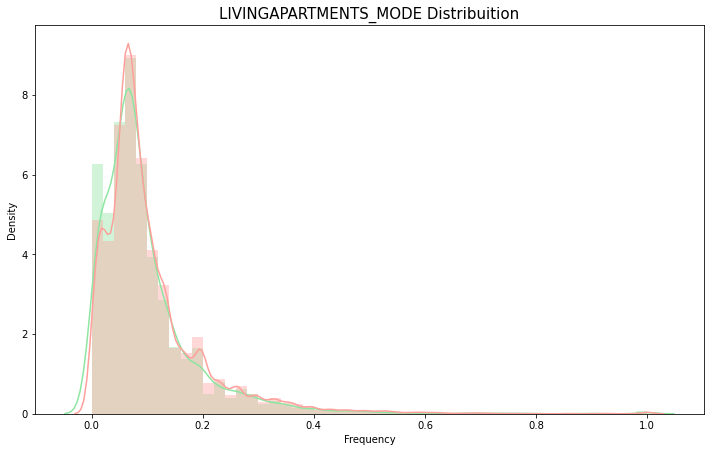




LIVINGAREA_MODE

         Count  TARGET_MEAN
TARGET                     
0       142447         0.11
1        10714         0.09


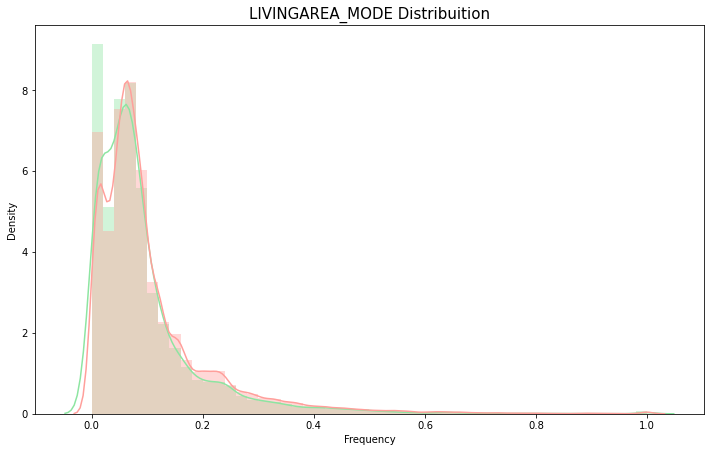




NONLIVINGAPARTMENTS_MODE

        Count  TARGET_MEAN
TARGET                    
0       87499         0.01
1        6498         0.01


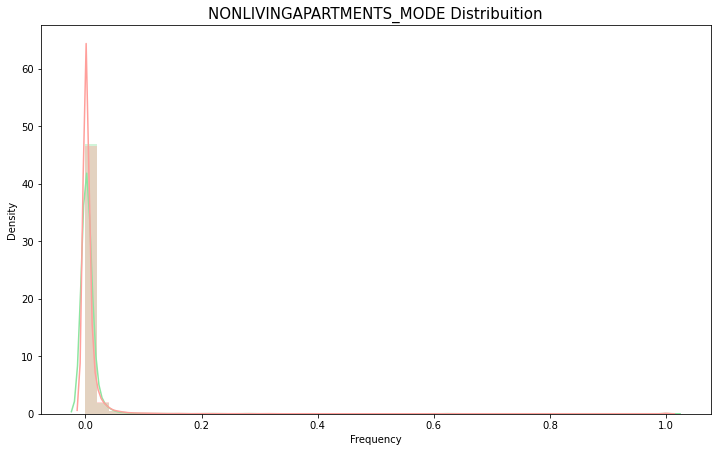




NONLIVINGAREA_MODE

         Count  TARGET_MEAN
TARGET                     
0       128334         0.03
1         9495         0.02


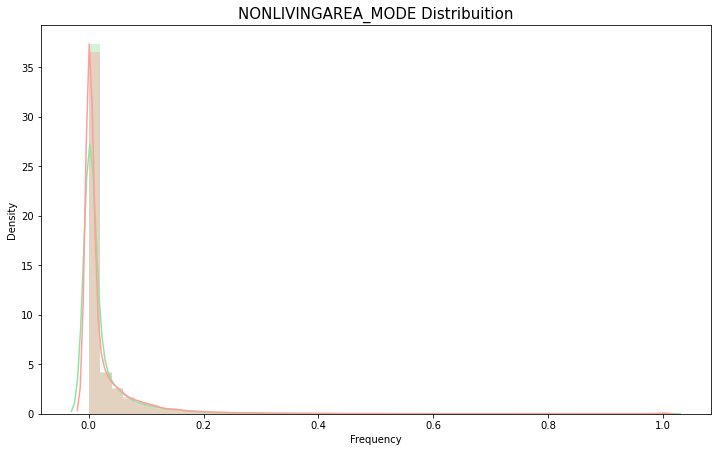




APARTMENTS_MEDI

         Count  TARGET_MEAN
TARGET                     
0       140910         0.12
1        10540         0.11


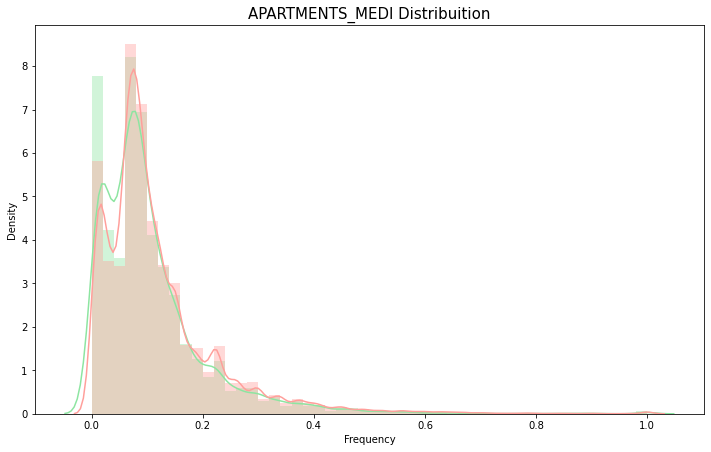




BASEMENTAREA_MEDI

         Count  TARGET_MEAN
TARGET                     
0       118781         0.09
1         8787         0.08


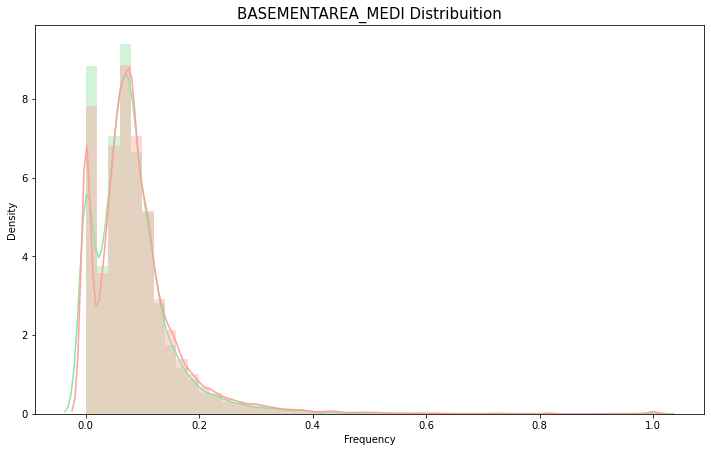




YEARS_BEGINEXPLUATATION_MEDI

         Count  TARGET_MEAN
TARGET                     
0       146487         0.98
1        11017         0.98


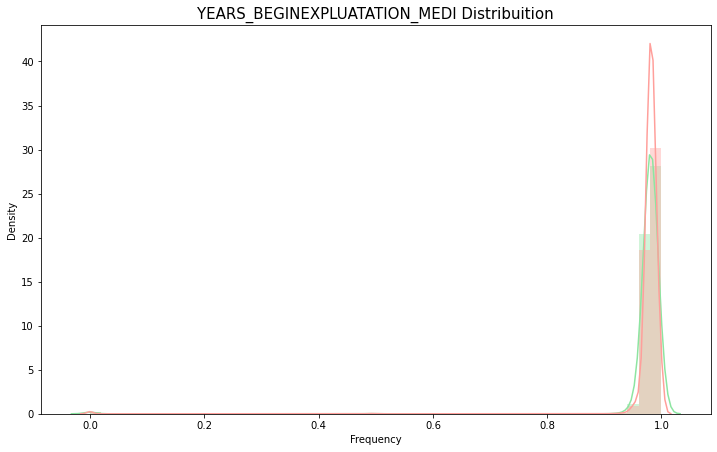




YEARS_BUILD_MEDI

        Count  TARGET_MEAN
TARGET                    
0       95949         0.76
1        7074         0.75


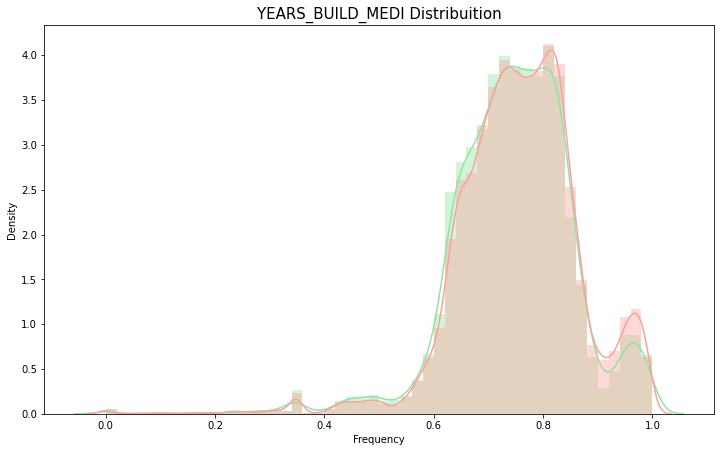




COMMONAREA_MEDI

        Count  TARGET_MEAN
TARGET                    
0       86244         0.04
1        6402         0.04


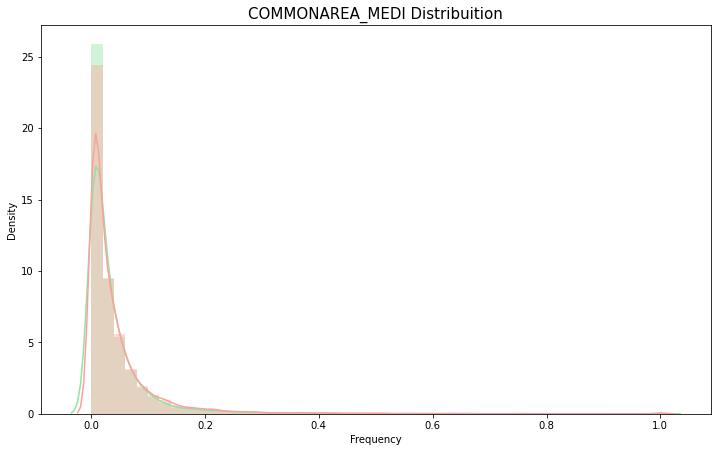




ELEVATORS_MEDI

         Count  TARGET_MEAN
TARGET                     
0       133710         0.08
1         9910         0.06


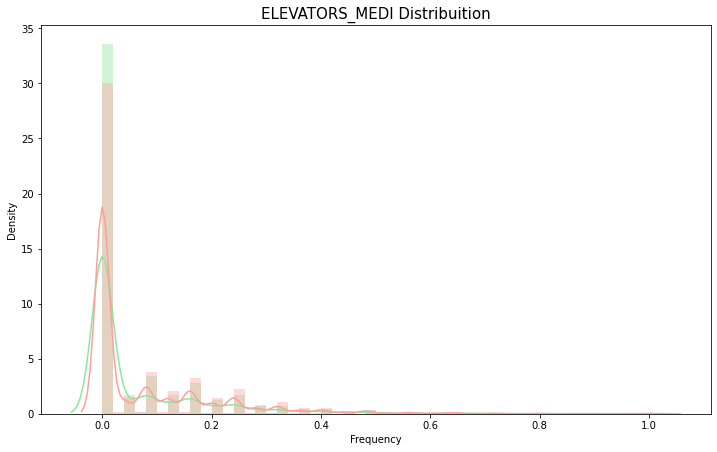




ENTRANCES_MEDI

         Count  TARGET_MEAN
TARGET                     
0       142069         0.15
1        10614         0.14


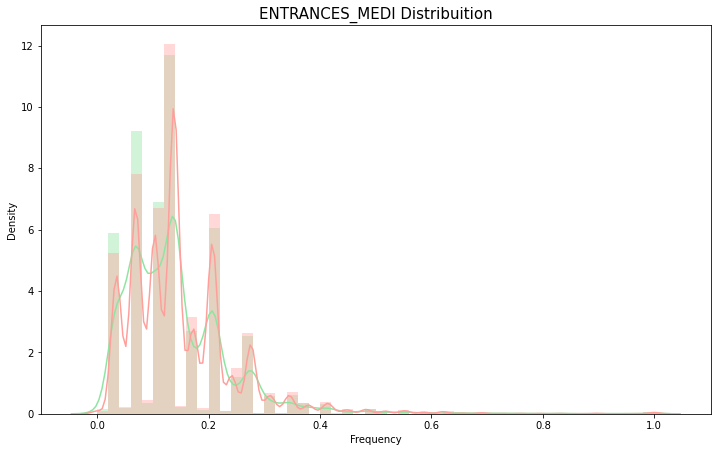




FLOORSMAX_MEDI

         Count  TARGET_MEAN
TARGET                     
0       143730         0.23
1        10761         0.20


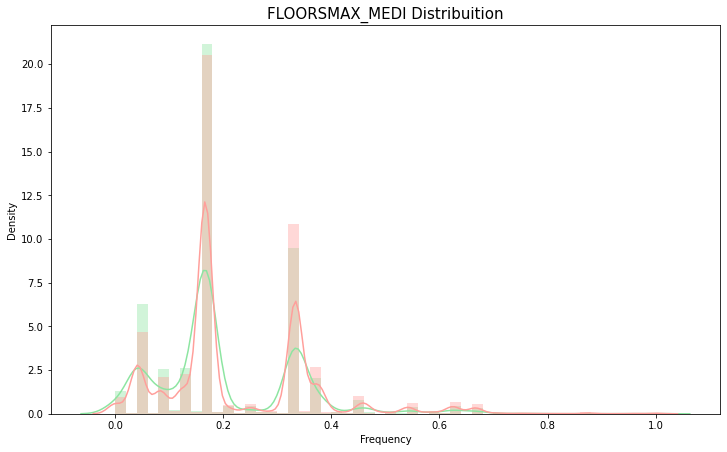




FLOORSMIN_MEDI

        Count  TARGET_MEAN
TARGET                    
0       92052         0.23
1        6817         0.21


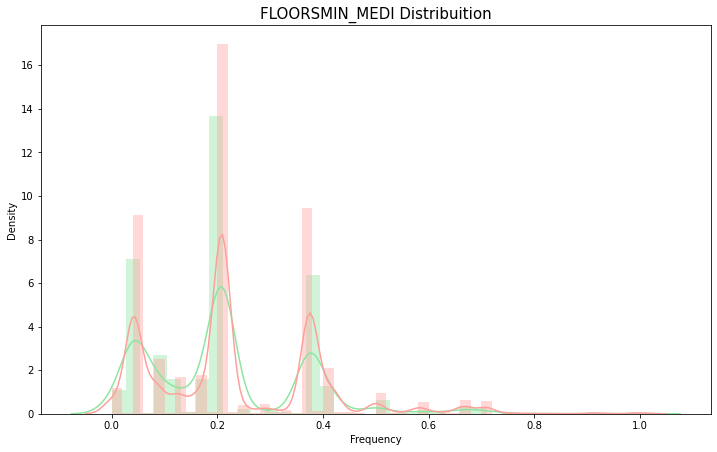




LANDAREA_MEDI

         Count  TARGET_MEAN
TARGET                     
0       116200         0.07
1         8721         0.06


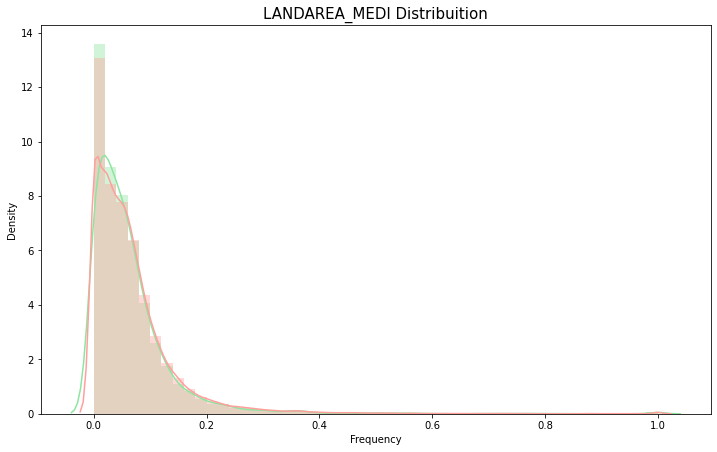




LIVINGAPARTMENTS_MEDI

        Count  TARGET_MEAN
TARGET                    
0       90609         0.10
1        6703         0.09


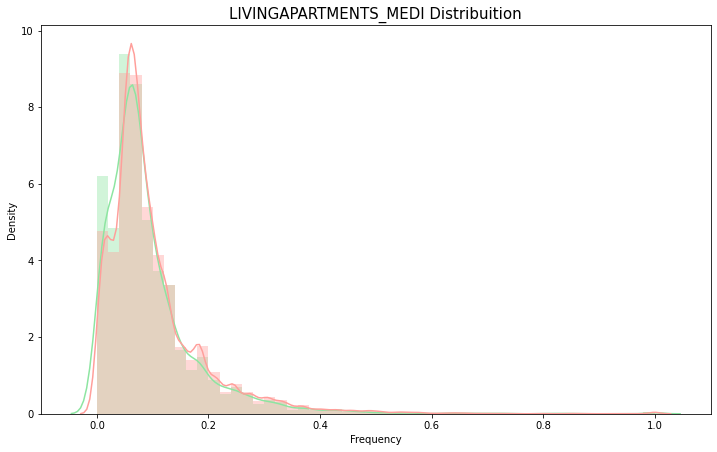




LIVINGAREA_MEDI

         Count  TARGET_MEAN
TARGET                     
0       142447         0.11
1        10714         0.10


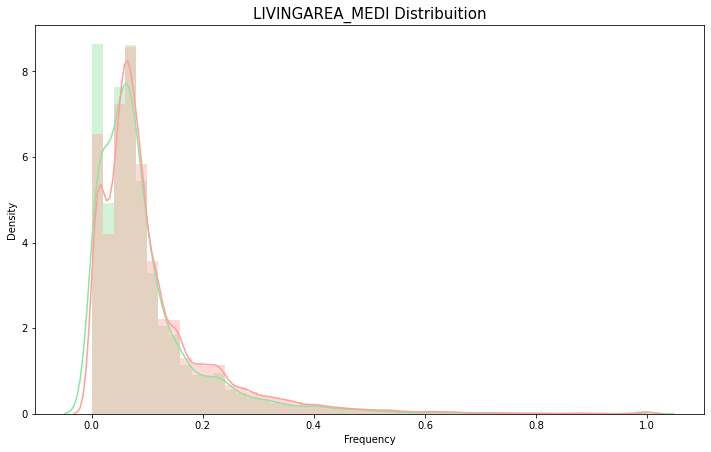




NONLIVINGAPARTMENTS_MEDI

        Count  TARGET_MEAN
TARGET                    
0       87499         0.01
1        6498         0.01


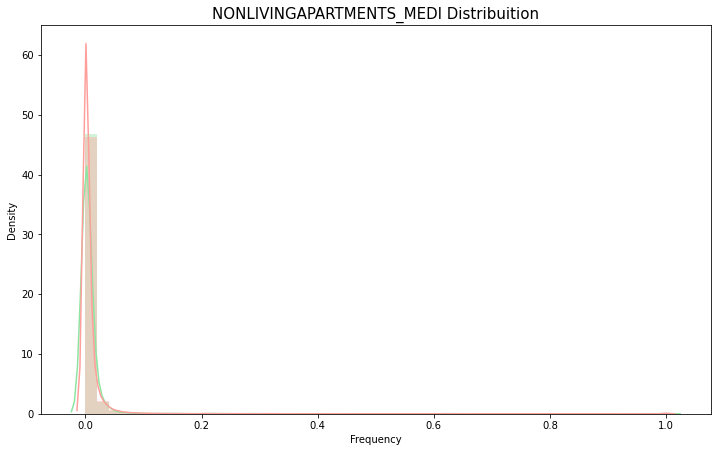




NONLIVINGAREA_MEDI

         Count  TARGET_MEAN
TARGET                     
0       128334         0.03
1         9495         0.02


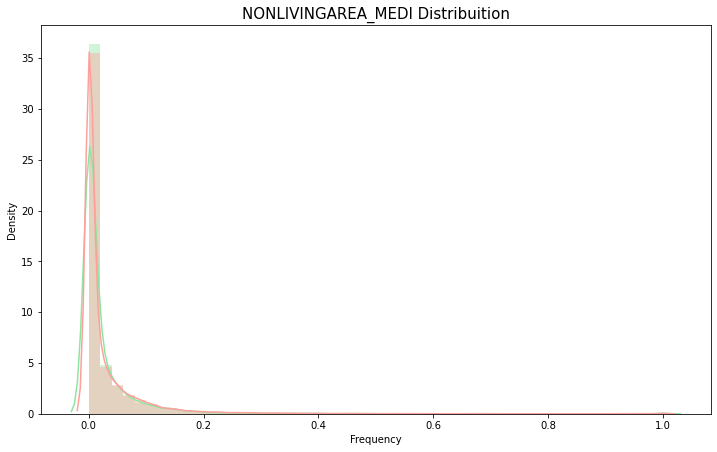




TOTALAREA_MODE

         Count  TARGET_MEAN
TARGET                     
0       147961         0.10
1        11119         0.09


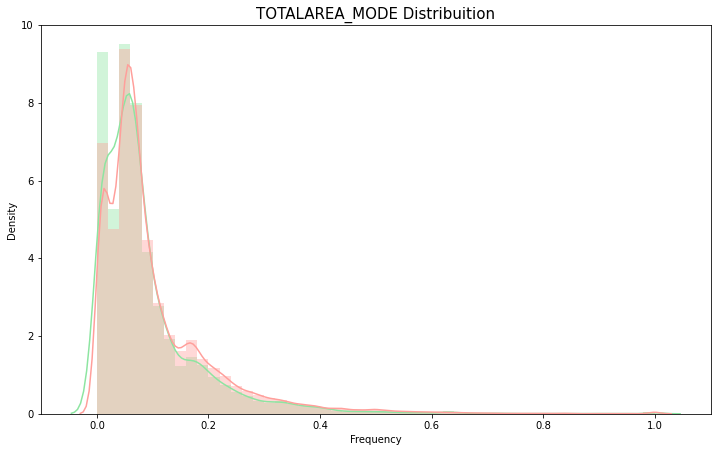




OBS_30_CNT_SOCIAL_CIRCLE

         Count  TARGET_MEAN
TARGET                     
0       281701         1.42
1        24789         1.50


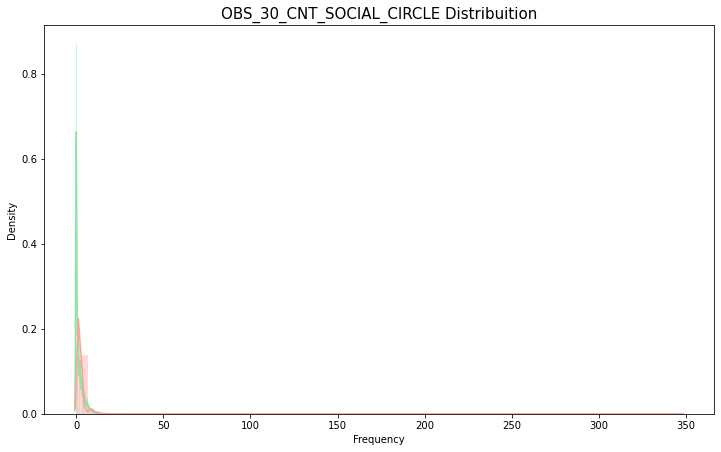




OBS_60_CNT_SOCIAL_CIRCLE

         Count  TARGET_MEAN
TARGET                     
0       281701         1.40
1        24789         1.48


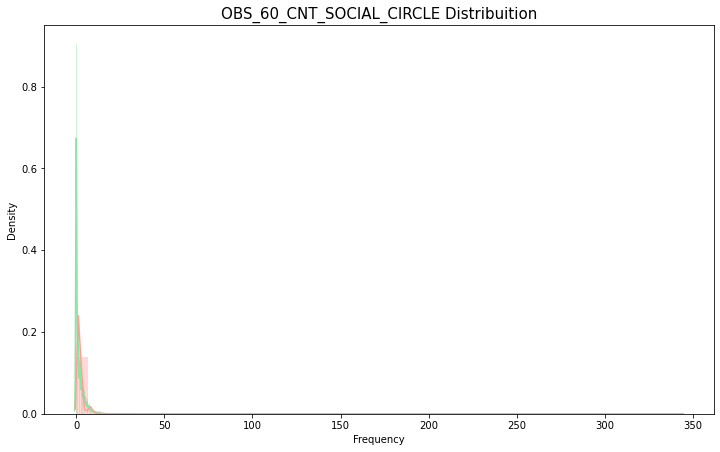




DAYS_LAST_PHONE_CHANGE

         Count  TARGET_MEAN
TARGET                     
0       282685      -976.39
1        24825      -808.80


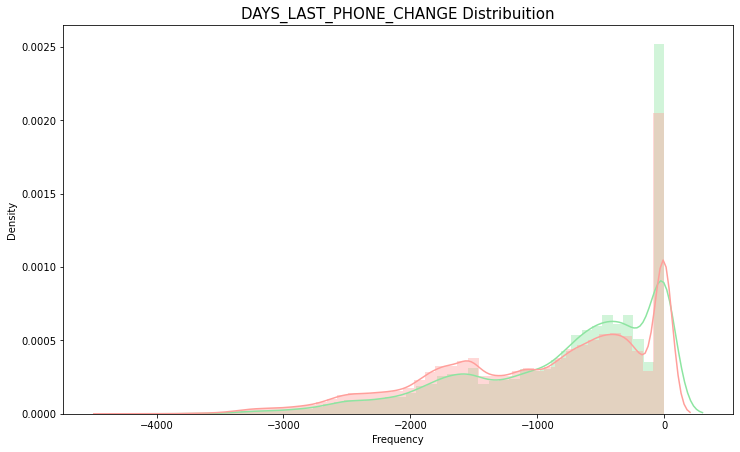

In [6]:
EDA(application_train,categoric_variable,numeric_variable,"TARGET")